<a href="https://colab.research.google.com/github/serg-kas/NN-archive/blob/main/%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_28_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Light задание

1. С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z*(12-z) + 5*y/x  равна 0 (символ ^2 -возведение в квадрат). Интервал изменения каждой переменной x, y, z и вывести на экран значение этой точки и значение функции в ней

2. Проведите анализ скорости сходимости до заданной вами точности (выберите точность, близкую к минимуму в прошлом примере) и заполните таблицу - какими были параметры и за сколько эпох алгоритм дошёл до нужной точности

    a. Выберите три разные размера популяции

    b. Выберите три разные коэффициента мутации
    
    c. Выберите три разных количества выживших

3. Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределение грузов по поездам:

    a. Поезда - 1, 12, 72, 4, 55, 1

    b. Грузы - 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8
4. Решите задачу расстановки грузов по поездам с дополнительным условием - надо заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):

    a. Поезда - 10, 10, 10, 12, 12, 12

    b. Грузы - 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6



## Импорт библиотек

In [ ]:
import numpy as np                              #библиотека numpy
import random as random                         #для генерации случайных значений

import matplotlib.pyplot as plt                 #модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors              #модуль colors библиотеки matplotlib

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline 

## Поиск нуля функции 

**f = x^2/y + z(12-z) + 5y/x** 

In [ ]:
##########################################
#    Функция получения выжившей популяции
##########################################
#        - popul - наша популяция
#        - val - текущие значения
#        - nsurv - количество выживших
#        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = []                          # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse)    # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv):                 # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i])         # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index])      # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval                  # Возвращаем новую популяцию (из nsurv элементов) и сортированный список


##########################################
#    Функция получения родителей
##########################################
#        Входные параметры:
#        - curr_popul - текущая популяция
#        - nsurv - количество выживших
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1)        # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1)        # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1]                   # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2]                   # Получаем второго бота-родителя по indexp2    
    return botp1, botp2                           # Возвращаем обоих полученных ботов


######################################################
#   Функция смешивания (кроссинговера) двух родителей
######################################################
#        Входные параметры:
#        - botp1 - первый бот-родитель
#        - botp2 - второй бот-родитель
#        - j - номер компонента бота
def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random()  # Получаем случайное число в диапазоне от 0 до 1   
    
    if pindex < 0.5:          # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
        x = botp1[j]
    else:
        x = botp2[j]
    return x                  # Возвращаем значение компонента бота

In [ ]:
###############################################################
# Задаем условия и параметры и запускаем генетический алгоритм
###############################################################

n = 100                         # Размер популяции
nsurv = 20                      # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv                # Количество новых (столько новых ботов создается)
l = 12                          # Длина бота
epohs = 500                     # Количество эпох
mut = 0.25                      # Коэфициент мутаций

popul = []       # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 12 компонентов каждый
val = []         # Одномерный массив значений этих ботов

# Первичное создание рандомных ботов
for i in range(n):                       # Цикл по всей длине популяции 
    popul.append([])                     # Создаем пустого бота
    for j in range(l):                   # Проходим по всей длине бота
        popul[i].append(random.random()) # В каждый компонент бота записываем рандомное значение 

# На кажной эпохе определяем выживших и создаем новых ботов
for it in range(epohs):                  # Цикл по эпохам обучения
    val = []                             # Создаем пустой список для значений ботов

    for i in range(n):                   # Проходим по всей длине популяции
        bot = popul[i]                   # Берем очередного бота
    
        # в каждом боте должны быть закодированы значения x,y и z 
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]         # первые 4 значения отводим для x
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]         # вторые 4 значения - для y
        z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]       # третьи 4 значения - для z
        f = (x**2)/y + z*(12-z) +5*y/x                        # функция по условию задания
        val.append(abs(f))                # добавляем модуль значения в список на эпоху
                                          # в этой задаче будем искать 0 функции

    # Получаем новую популяцию и сортированный список значнией
    # (здесь пока только "выжившие" == nsurv)
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)       
    print(it, " ", [round(s,8) for s in sval[0:5]])           # Выводим 5 лучших ботов из выживших
 

    for i in range(nnew):                 # Проходимся в цикле nnew-раз (сколько нужно новых ботов)
        botp1, botp2 = getParents(newpopul, nsurv)            # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                       # Массив для нового бота
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l):                # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)       # Получаем значение для j-ого компонента бота
            x += mut*(2*random.random() - 1.0)     #Добавлялем к значению бота случайную величину, зависящую от коэфециента мутации        
            newbot.append(x)              # Добавляем новое значение в бота      
        newpopul.append(newbot)           # Добавляем бота в новую популяцию 
    
    popul = newpopul                      # Записываем в popul посчитанную новую популяцию

In [ ]:

# Выведем первого (лучшего) бота в финальной популяции, получившиеся x,y,z и значение функции f
bot = popul[0]                      
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]            # Считаем x
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]            # Считаем y
z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]          # Считаем z
f = (x**2)/y + z*(12-z) +5*y/x                           # Считаем значение функции

print(bot)                             # Выводим бота (12 компонент)
print('x =',x, 'y =', y, 'z=', z)      # Выводим значения x, y и z
print("f =",f)                         # Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)

[0.5627047408836932, 0.9400053358575255, 0.8540419863558233, 0.41411264781939483, 0.36729756232199934, 1.1107463866104113, 0.6157512891874317, 1.0119506704094667, -0.19245766382822288, 0.34419496978707126, 0.629327672607378, 0.23530512981718565]
x = 24.155967479214425 y = 37.377309147485036 z= 13.704422156610555
f = -0.01009554190051798


In [ ]:
##################################################
#Анализ скорости сходимости к точности f <= 0.003
bias = 0.003
##################################################

n_list = [80, 100, 120]              # список вариантов размера популяции
nsurv_list = [15,20,40]              # список вариантов количества выживших
mut_list = [0.15, 0.25, 0.35]        # список вариантов коэффициентов мутации


#Запустим цикл по всем вариантам сочетаний исследуемых параметров
for n_curr in n_list:
  for nsurv_curr in nsurv_list:
    for mut_curr in mut_list:

      n = n_curr                      # Размер популяции
      nsurv = nsurv_curr              # Количество выживших (столько лучших переходит в новую популяцию)
      nnew = n - nsurv                # Количество новых (столько новых ботов создается)
      l = 12                          # Длина бота
      epohs = 500                     # Количество эпох
      mut = mut_curr                  # Коэфициент мутаций

      popul = []       # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 12 компонентов каждый
      val = []         # Одномерный массив значений этих ботов

      # Первичное создание рандомных ботов
      for i in range(n):                       # Цикл по всей длине популяции 
        popul.append([])                       # Создаем пустого бота
        for j in range(l):                     # Проходим по всей длине бота
          popul[i].append(random.random())     # В каждый компонент бота записываем рандомное значение 

      # На кажной эпохе определяем выживших и создаем новых ботов
      for it in range(epohs):                  # Цикл по эпохам обучения
        val = []                               # Создаем пустой список для значений ботов

        for i in range(n):                       # Проходим по всей длине популяции
          bot = popul[i]                         # Берем очередного бота
    
          # в каждом боте должны быть закодированы значения x,y и z 
          x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]         # первые 4 значения отводим для x
          y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]         # вторые 4 значения - для y
          z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]       # третьи 4 значения - для z
          f = (x**2)/y + z*(12-z) +5*y/x                        # функция по условию задания
          val.append(abs(f))                # добавляем модуль значения в список на эпоху
                                            # в этой задаче будем искать 0 функции

        # Получаем новую популяцию и сортированный список значнией
        # (здесь пока только "выжившие" == nsurv)
        newpopul, sval = getSurvPopul(popul, val, nsurv, 0)       
        #print(it, " ", [round(s,8) for s in sval[0:5]])           # Выводим 5 лучших ботов из выживших
 

        for i in range(nnew):                 # Проходимся в цикле nnew-раз (сколько нужно новых ботов)
          botp1, botp2 = getParents(newpopul, nsurv)            # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
          newbot = []                       # Массив для нового бота
          # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
          for j in range(l):                # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)       # Получаем значение для j-ого компонента бота
            x += mut*(2*random.random() - 1.0)     #Добавлялем к значению бота случайную величину, зависящую от коэфециента мутации        
            newbot.append(x)              # Добавляем новое значение в бота      
          newpopul.append(newbot)           # Добавляем бота в новую популяцию 
    
        popul = newpopul                      # Записываем в popul посчитанную новую популяцию

        # Выведем первого (лучшего) бота в финальной популяции, получившиеся x,y,z и значение функции f
        bot = popul[0]       
        #print(bot)               
        x_curr = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]                  # Считаем x по лучшему на данной эпохе боту
        y_curr = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]                  # Считаем y по лучшему на данной эпохе боту
        z_curr = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]                # Считаем z по лучшему на данной эпохе боиу
        f_curr = (x_curr**2)/y_curr + z_curr*(12-z_curr) +5*y_curr/x_curr   # Считаем значение функции
        # Если значение меньше BIAS, то печатаем параметры и выходим цикла по эпохам
        if abs(f_curr) <= bias:
          print('n=', n_curr,'nsurv=', nsurv_curr,'mut=', mut_curr, 'f=', f_curr, 'на эпохе:', it)
          break
        if (it == epohs -1):
          print('n=', n_curr,'nsurv=', nsurv_curr,'mut=', mut_curr, 'нет решения за',it,'эпох')
      
      




n= 80 nsurv= 15 mut= 0.15 f= 0.0019008327513478918 на эпохе: 128
n= 80 nsurv= 15 mut= 0.25 f= 0.00013322996787401564 на эпохе: 100
n= 80 nsurv= 15 mut= 0.35 нет решения за 499 эпох
n= 80 nsurv= 20 mut= 0.15 f= -0.0024177101038915794 на эпохе: 359
n= 80 nsurv= 20 mut= 0.25 нет решения за 499 эпох
n= 80 nsurv= 20 mut= 0.35 нет решения за 499 эпох
n= 80 nsurv= 40 mut= 0.15 f= -0.0010947371338865253 на эпохе: 98
n= 80 nsurv= 40 mut= 0.25 f= 1.0156619184797933e-05 на эпохе: 29
n= 80 nsurv= 40 mut= 0.35 нет решения за 499 эпох
n= 100 nsurv= 15 mut= 0.15 f= -0.0005006115369869946 на эпохе: 24
n= 100 nsurv= 15 mut= 0.25 f= 6.528900597047027e-06 на эпохе: 300
n= 100 nsurv= 15 mut= 0.35 f= -0.0005327493789764048 на эпохе: 158
n= 100 nsurv= 20 mut= 0.15 нет решения за 499 эпох
n= 100 nsurv= 20 mut= 0.25 нет решения за 499 эпох
n= 100 nsurv= 20 mut= 0.35 f= 0.0006636904463555027 на эпохе: 324
n= 100 nsurv= 40 mut= 0.15 f= -0.002097891190044443 на эпохе: 1
n= 100 nsurv= 40 mut= 0.25 нет решения за 

**При бОльшем количестве эпох сходятся все решения. Оставил 500, чтобы наглядно были видны аутсайдеры.**

**Видны некоторые "некомфортные" сочетания параметров. Например малое количество выживших ботов к их общему количеству.**

## Распределение грузов по поездам -1

**Полное распределение грузов по поездам**


In [ ]:
#####################################################
# Берем параметры грузов и поездов из условий задачи
#####################################################

# Вместимость каждого поезда
train = np.array([1, 12, 72, 4, 55, 1]) 

# Размер каждого груза (сумма грузов должна быть равна вместимости всех поездов (145=145))
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) 

print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

145
145
(6,)
(18,)


0   163.51   [52, 56, 84, 84, 86, 90, 92, 92, 92, 94, 94, 94, 94, 94, 96, 96, 96, 96, 96, 100]
1   122.57   [34, 48, 50, 52, 52, 54, 56, 58, 60, 60, 62, 66, 66, 68, 72, 74, 74, 78, 78, 78]
2   109.44   [34, 40, 44, 46, 46, 48, 48, 50, 50, 50, 52, 52, 54, 54, 54, 56, 56, 56, 58, 58]
3   95.89   [28, 34, 36, 40, 40, 40, 42, 44, 44, 44, 44, 46, 46, 46, 48, 48, 48, 48, 48, 50]
4   92.35   [28, 28, 34, 34, 34, 36, 36, 40, 40, 40, 42, 42, 44, 44, 44, 44, 44, 46, 46, 46]
5   87.35   [28, 28, 28, 32, 34, 34, 34, 34, 36, 36, 36, 36, 38, 38, 40, 40, 40, 40, 42, 42]
6   83.91   [22, 28, 28, 28, 32, 32, 34, 34, 34, 34, 36, 36, 36, 36, 36, 36, 38, 38, 40, 40]
7   82.61   [20, 22, 24, 26, 28, 28, 28, 28, 28, 32, 32, 34, 34, 34, 34, 34, 36, 36, 36, 36]
8   84.83   [16, 20, 20, 22, 24, 26, 28, 28, 28, 28, 28, 28, 30, 32, 32, 34, 34, 34, 34, 34]
9   79.43   [16, 20, 20, 20, 22, 24, 24, 26, 26, 28, 28, 28, 28, 28, 28, 28, 30, 30, 30, 30]
10   77.39   [10, 16, 20, 20, 20, 22, 24, 24, 24, 24, 26, 26, 26, 

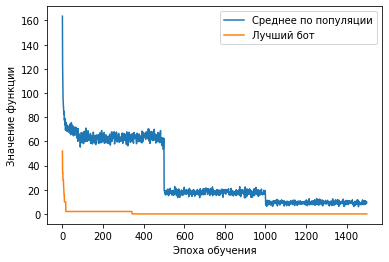

In [ ]:
n = 200                                  # Общее число ботов
nsurv = 40                               # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                           # Количество новых (столько новых ботов создается)
epohs = 1500                             # количество эпох
mut = 0.4                                # коэфициент мутаций

# Длина бота == количество единиц груза 
# Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                  # Количество поездов
 
popul = []                               # Двумерный массив популяции, размерностью [n, l].
val = []                                 # Одномерный массив значений этих ботов

plotmeanval = []                         # сюда будут заносится значения для графика по среднему значению
plotminval = []                          # сюда будут заносится значения для графика по минимальному значению
 

# Проходим по всей длине популяции
for i in range(n): 
    popul.append([])                     # Создаем пустого бота
    for j in range(l):                   # Проходим по всей длине бота        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

# Проходим по всем эпохам
for it in range(epohs): 

    if (it == 500):                      # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000):                     # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  
    

    val = []                             # Создаем пустой список для значений ботов

    # Проходим по всей популяции
    for i in range(n): 
        bot = popul[i]                                       # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0])             # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                   # Проходим по всей длине бота
            trainfill[bot[j]] += size[j]                     # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0                                                # Обнуляем ошибку i-го бота 
        for t in range(trains):                              # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(train[t] - trainfill[t]) 
        val.append(f)                                         # Добавляем в val значение ошибки для i-го бота    

    # Получаем новую популяцию и сортированный список значнией
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    print(it, " ", sum(val) / len(val), " ", sval[0:20])      # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                   # Добавляем среднее значение в список
    plotminval.append(sval[0])                                # Добавляем минимальное значение в список
    
    # Проходимся в цикле nnew-раз
    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv)            # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                           # Массив для нового бота
    
        for j in range(l):                                    # Проходим по всей длине бота
            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j)       
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                  # Добавляем новое значение в бота      
        newpopul.append(newbot)                               # Добавляем бота в новую популяцию    
    popul = newpopul                                          # Записываем в popul новую посчитанную популяцию

# построение графиков  
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 5 лучших ботов
for i in range(5):
    print(popul[i])

[4, 5, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 1]
[4, 5, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 1]
[4, 5, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 1]
[4, 5, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 1]
[4, 5, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 1]


In [ ]:
bot = popul[0]                                       # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)                # Выводим значения бота (каждый параметр == номер поезда)

trainfill = np.zeros(trains, dtype = 'int32')        # Массив заполненности поездов
for j in range(l):                                   # Проходим по всей длине бота
    trainfill[bot[j]] += size[j]                     # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill)    # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)       # Выводим реальную вместимость поездов

Значения лучшего бота: [4, 5, 2, 0, 1, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 1]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


**Для решения задачи на усложенных условиях достаточно было удвоить число ботов 100->200  и удвоить число выживших 20->40**

## Распределение грузов по поездам -2 

**Равномерное заполнение при избыточной суммарной вместимости вагонов**

In [ ]:
#####################################################
# Берем параметры грузов и поездов из условий задачи
#####################################################

# Вместимость каждого поезда
train = np.array([10, 10, 10, 12, 12, 12]) 


# Размер каждого груза (сумма грузов меньше вместимости всех поездов (66 > 54))
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) 

print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

66
54
(6,)
(18,)


In [ ]:
# Введем метрику для оптимизации распределения груза по вагонам.
# Это будет средняя заполняемость вагона = сумма груза / количество вагонов.

mean_train = size.sum() / train.shape[0]
print('Метрика равномерности заполняемости вагона:', mean_train)

Метрика равномерности заполняемости вагона: 9.0


0   26.22   [8.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0]
1   22.61   [6.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0]
2   21.23   [6.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
3   20.62   [4.0, 6.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0]
4   20.31   [4.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
5   19.66   [4.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
6   19.16   [4.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0]
7   20.15   [4.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
8   

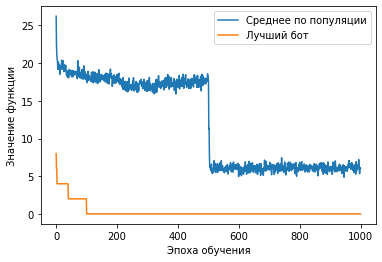

In [ ]:
n = 200                                  # Общее число ботов
nsurv = 40                               # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                           # Количество новых (столько новых ботов создается)
epohs = 1000                             # количество эпох
mut = 0.4                                # коэфициент мутаций

# Длина бота == количество единиц груза 
# Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                  # Количество поездов
 
popul = []                               # Двумерный массив популяции, размерностью [n, l].
val = []                                 # Одномерный массив значений этих ботов

plotmeanval = []                         # сюда будут заносится значения для графика по среднему значению
plotminval = []                          # сюда будут заносится значения для графика по минимальному значению
 

# Проходим по всей длине популяции
for i in range(n): 
    popul.append([])                     # Создаем пустого бота
    for j in range(l):                   # Проходим по всей длине бота        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

# Проходим по всем эпохам
for it in range(epohs): 

    if (it == 500):                      # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000):                     # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = []                             # Создаем пустой список для значений ботов

    # Проходим по всей популяции
    for i in range(n): 
        bot = popul[i]                                       # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0])             # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                   # Проходим по всей длине бота
            trainfill[bot[j]] += size[j]                     # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0                                                # Обнуляем ошибку i-го бота 
        for t in range(trains):                              # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            #f += abs(train[t] - trainfill[t])
            f += abs(mean_train - trainfill[t])               # ОПТИМИЗИРУЕМ ПО РАВНОМЕРНОСТИ
        val.append(f)                                         # Добавляем в val значение ошибки для i-го бота    

    # Получаем новую популяцию и сортированный список значнией
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    print(it, " ", sum(val) / len(val), " ", sval[0:20])      # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                   # Добавляем среднее значение в список
    plotminval.append(sval[0])                                # Добавляем минимальное значение в список
    
    # Проходимся в цикле nnew-раз
    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv)            # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                           # Массив для нового бота
    
        for j in range(l):                                    # Проходим по всей длине бота
            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j)       
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                  # Добавляем новое значение в бота      
        newpopul.append(newbot)                               # Добавляем бота в новую популяцию    
    popul = newpopul                                          # Записываем в popul новую посчитанную популяцию

# построение графиков  
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 5 лучших ботов
for i in range(5):
    print(popul[i])


[1, 2, 5, 2, 2, 4, 1, 5, 4, 1, 1, 3, 0, 4, 0, 2, 3, 5]
[1, 2, 5, 2, 2, 4, 1, 5, 4, 1, 1, 3, 0, 4, 0, 2, 3, 5]
[1, 2, 5, 2, 2, 4, 1, 5, 4, 1, 1, 3, 0, 4, 0, 2, 3, 5]
[1, 2, 5, 2, 2, 4, 1, 5, 4, 1, 1, 3, 0, 4, 0, 2, 3, 5]
[1, 2, 5, 2, 2, 4, 1, 5, 4, 1, 1, 3, 0, 4, 0, 2, 3, 5]


In [ ]:
bot = popul[0]                                       # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)                # Выводим значения бота (каждый параметр == номер поезда)

trainfill = np.zeros(trains, dtype = 'int32')        # Массив заполненности поездов
for j in range(l):                                   # Проходим по всей длине бота
    trainfill[bot[j]] += size[j]                     # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill)    # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)       # Выводим реальную вместимость поездов

Значения лучшего бота: [1, 2, 5, 2, 2, 4, 1, 5, 4, 1, 1, 3, 0, 4, 0, 2, 3, 5]
Вместимость поездов по боту: [9 9 9 9 9 9]
Реальная вместимость поездов: [10 10 10 12 12 12]


**Изменили функцию оценки качества бота. Придумали метрику равномерности распределения груза. Это среднее = сумма груза / количество вагонов. Получили искомое для этих условий распределение груза по вагонам [9 9 9 9 9 9]**



##PRO задание. 

**Вариант 1**

Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте 3 класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались
Нужно расставить индексы точек, к какому классу относится какая точка, с помощью генетического алгоритма. В результате, каждый класс должен состоять из точек одного и того же индекса
Визуализируйте процесс обучение и итоговый результат


In [ ]:
#Определим  функции

##################################################
# Функция расчета расстояния между двумя точками
# На вход принимает координаты точек
# Возвращает расстояние между точками
##################################################
def points_dist(x1, y1, x2, y2):
  return np.sqrt((x2-x1)**2 + (y2-y1)**2)

##################################################
# Функция отрисовки точек в цветах по классам
# Принимает массив точек
##################################################
def plot_points(points):

  #без ошибки выведется до 8 цветов
  colors = ['b','g','r','c','m','y','k','w']

  plt.figure(figsize=(10,10))
  for p in range(len(points)):
    plt.scatter(points[p,0], points[p,1], c=colors[int(points[p,2])+1])

  plt.xlabel('X')
  plt.ylabel('Y')
  #plt.legend()
  plt.show()


In [ ]:
##########################################
#    Функция получения выжившей популяции
##########################################
#        - popul - наша популяция
#        - val - текущие значения
#        - nsurv - количество выживших
#        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
def getSurvPopul2(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = []                          # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse)    # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv):                 # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i])         # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index])      # В новую популяцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval                  # Возвращаем новую популяцию (из nsurv элементов) и сортированный список


##########################################
#    Функция получения родителей
##########################################
#        Входные параметры:
#        - curr_popul - текущая популяция
#        - nsurv - количество выживших
def getParents2(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1)        # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1)        # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1]                   # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2]                   # Получаем второго бота-родителя по indexp2    
    return botp1, botp2                           # Возвращаем обоих полученных ботов


######################################################
#   Функция смешивания (кроссинговера) двух родителей
######################################################
#        Входные параметры:
#        - botp1 - первый бот-родитель
#        - botp2 - второй бот-родитель
#        - j - номер компонента бота
def crossPointFrom2Parents2(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random()  # Получаем случайное число в диапазоне от 0 до 1   
    
    if pindex < 0.5:          # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
        x = botp1[j]
    else:
        x = botp2[j]
    return x                  # Возвращаем значение компонента бота

(100, 3)


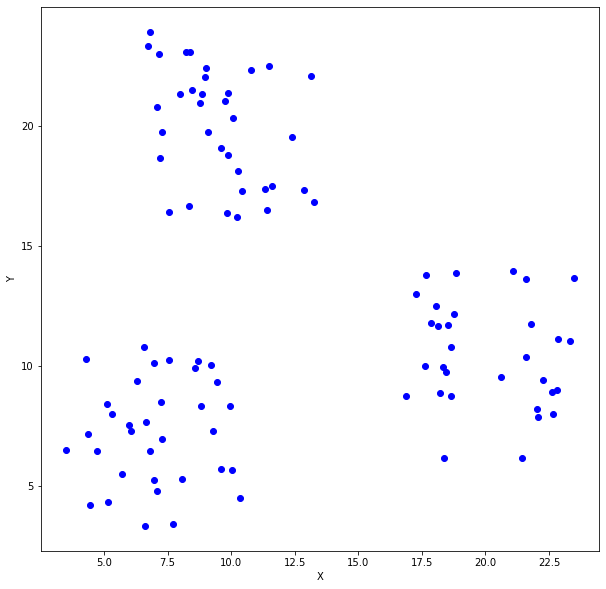

In [ ]:
# Подготовка данных

#######################################################
# Создаем множество точек в двумерном пространстве

# Формат точки будет [X, Y, класс]
# класс  = номер класса от 0 и далее; или -1 если не установлен

N_points = 100       #сколько точек делаем

# Классы зададим координатами их центров
Classes = [[7,7], [20,10], [10,20]]  
########################################################

points = []   #пустой список для будущих точек

# Генерируемые точки группируются вокруг заданных центров классов
# но метка класса остается -1 (точка "не знает" кому она принадлежит)
for _ in range(N_points):

  curr_point = [0,0,-1]                             #пустая новая точка  
  curr_class = random.randint(0, len(Classes)-1)    #случайно выбранный класс
  
  curr_point[0] = Classes[curr_class][0] + 3.5*random.uniform(-1,1)   #координата X                 
  curr_point[1] = Classes[curr_class][1] + 4*random.uniform(-1,1)     #координата Y
  #curr_point[2] = curr_class
  
  points.append(curr_point)                         #сохраняем точку в список
 
# Сделаем массив
points_array = np.array(points)
print(points_array.shape)

# Отрисуем созданные точки
plot_points(points_array)


**Так как координаты центроидов (средние координаты кластеров) 
являются по сути исходными данными, то рассчитывать их заново не будем. Построим генетический алгоритм, который будет разносить точки по кластерам.**

Закончена эпоха 0


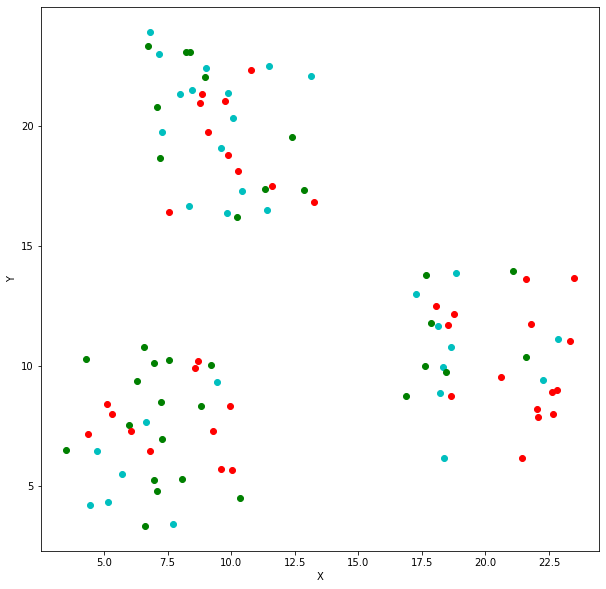

Закончена эпоха 1


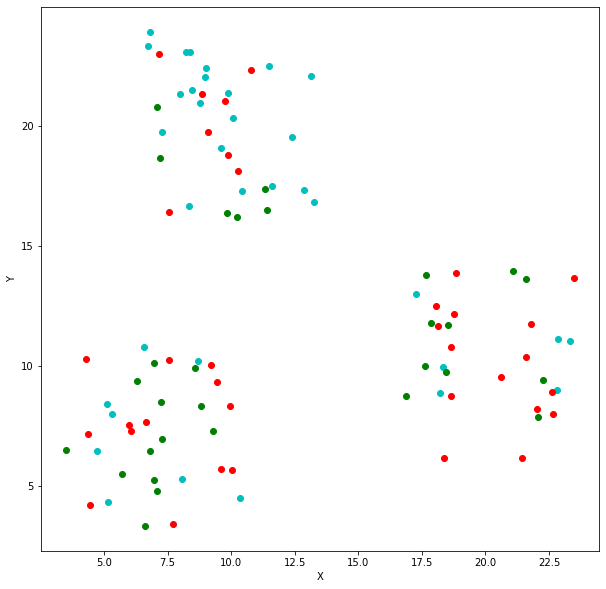

Закончена эпоха 2


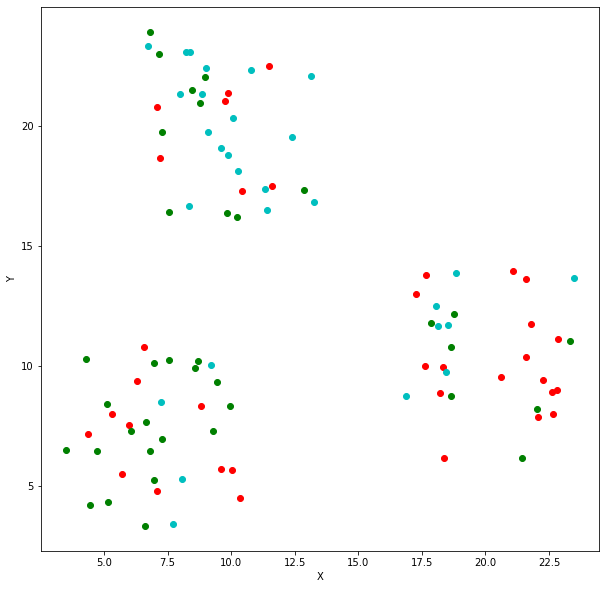

Закончена эпоха 3


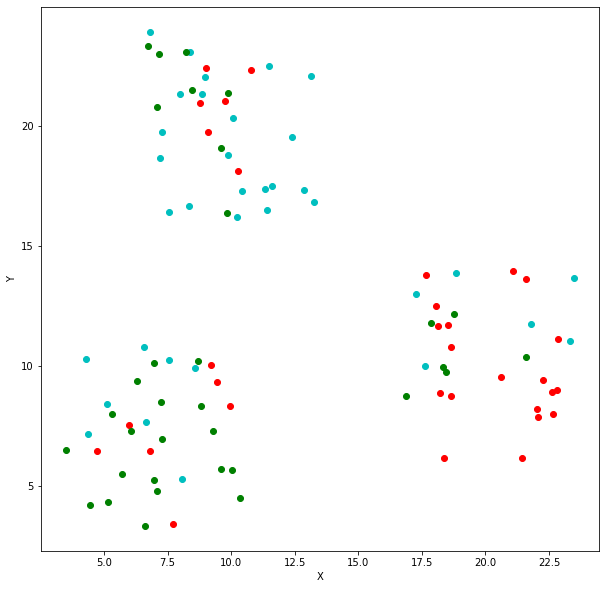

Закончена эпоха 4


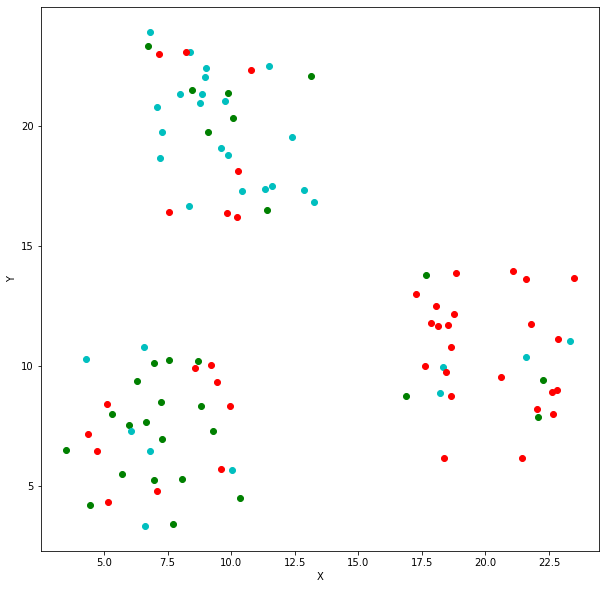

Закончена эпоха 5


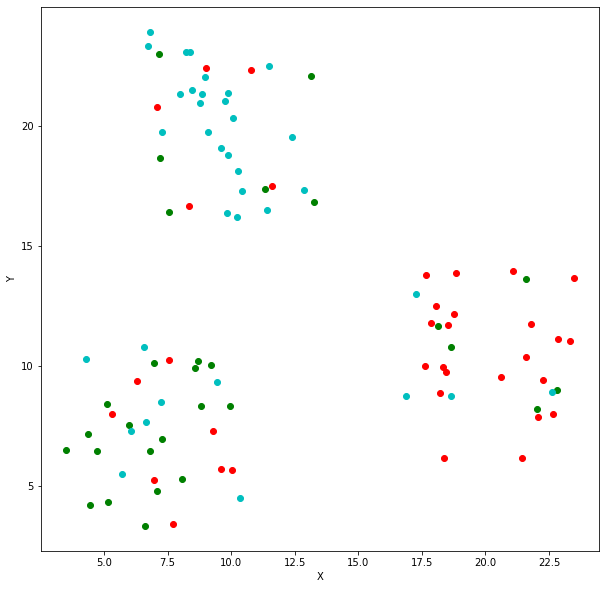

Закончена эпоха 6


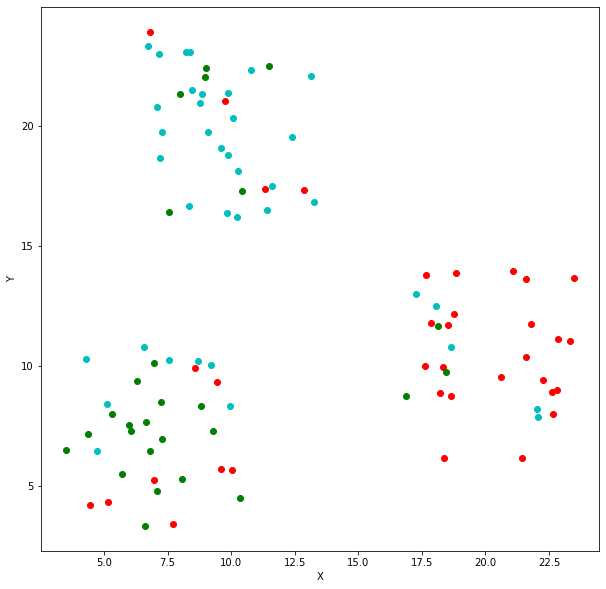

Закончена эпоха 7


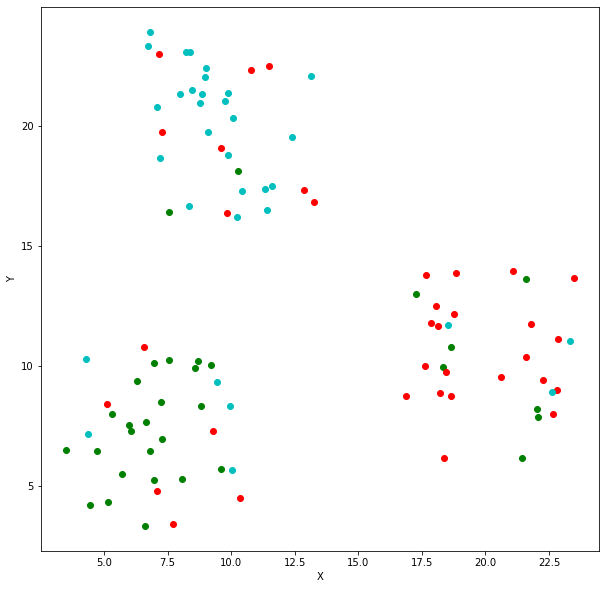

Закончена эпоха 8


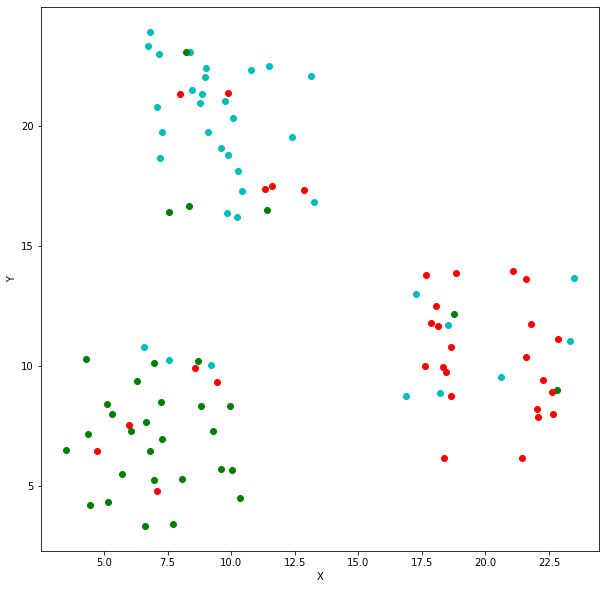

Закончена эпоха 9


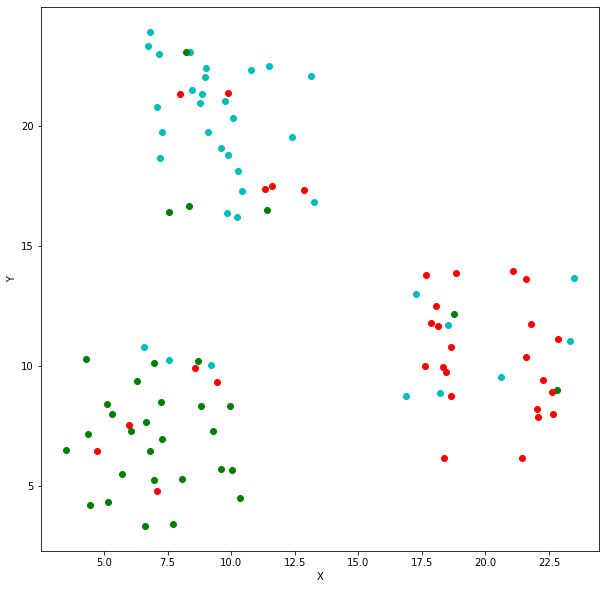

Закончена эпоха 10


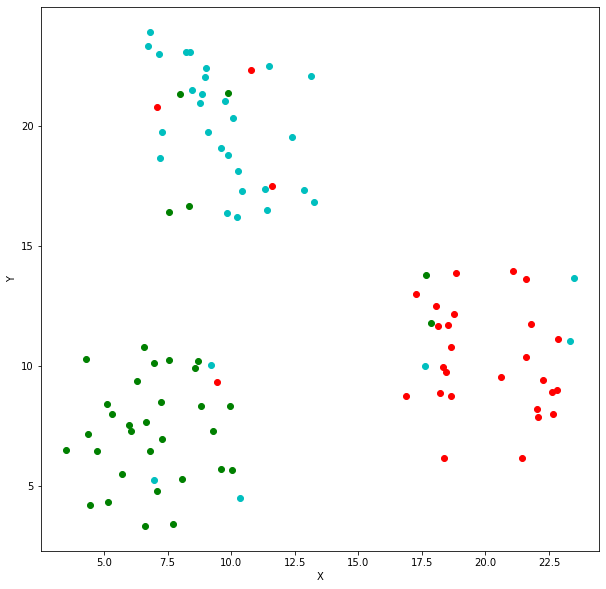

Закончена эпоха 11


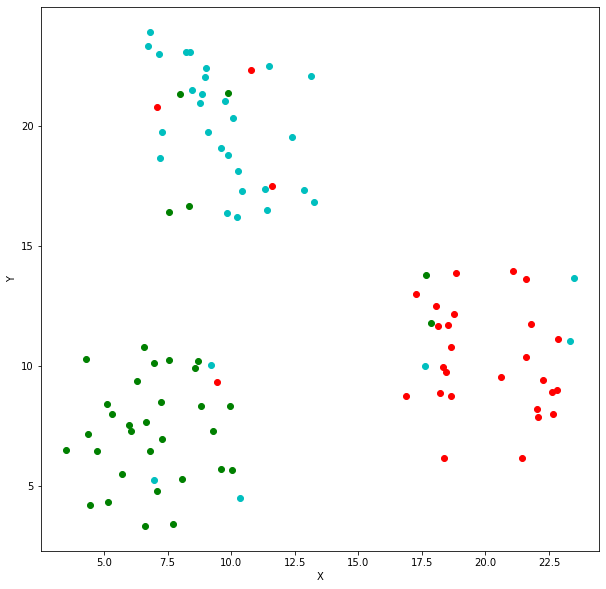

Закончена эпоха 12


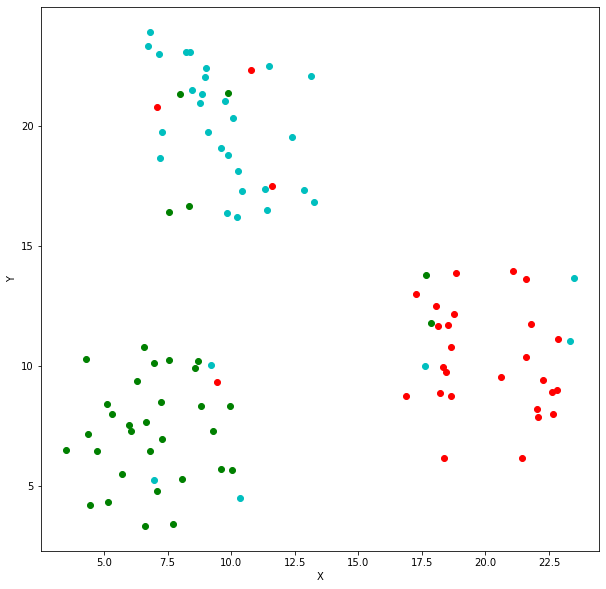

Закончена эпоха 13


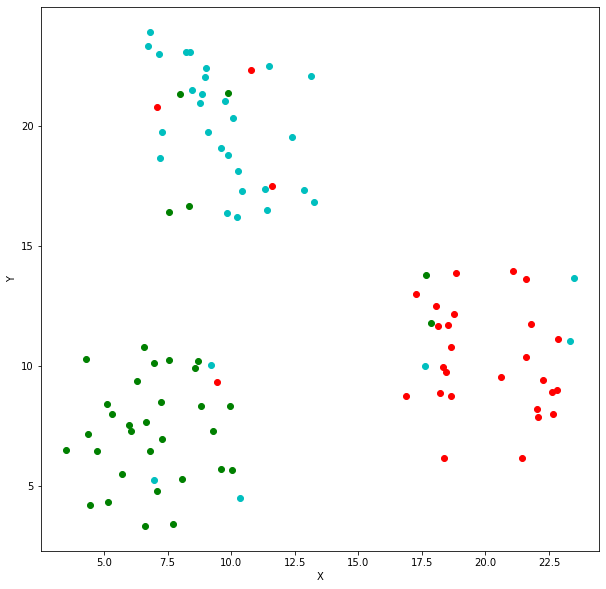

Закончена эпоха 14


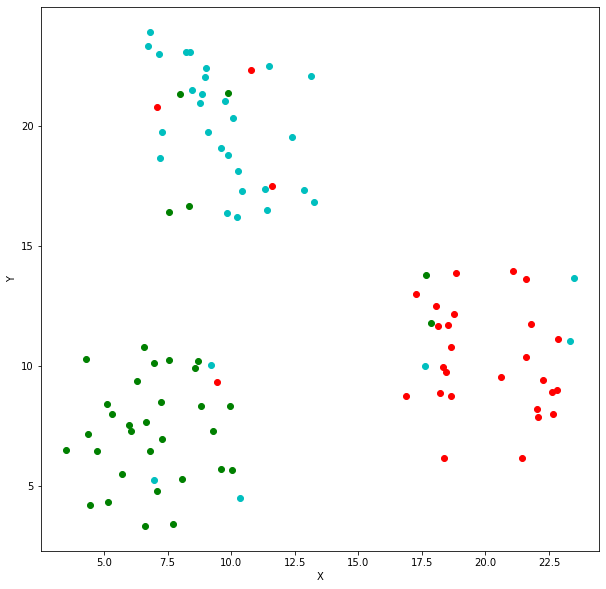

Закончена эпоха 15


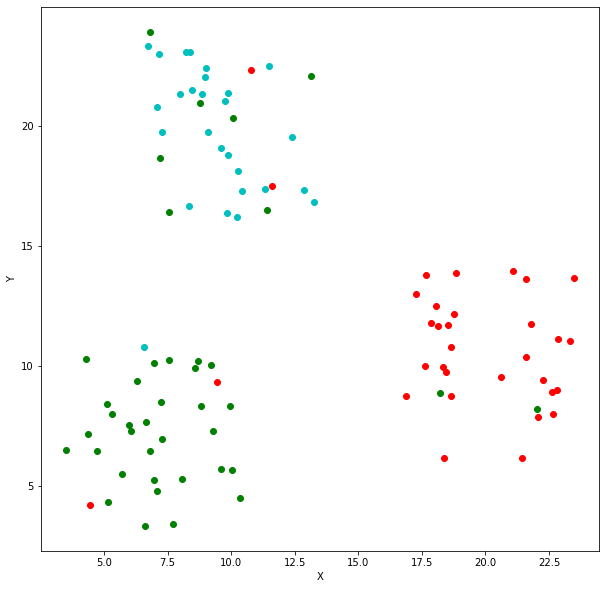

Закончена эпоха 16


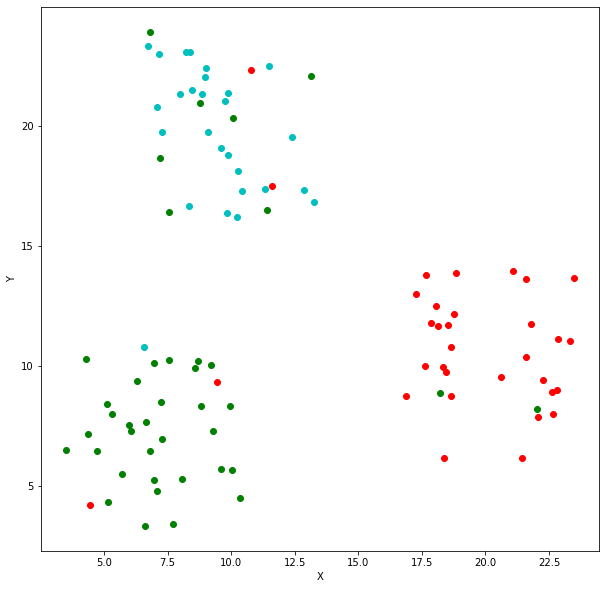

Закончена эпоха 17


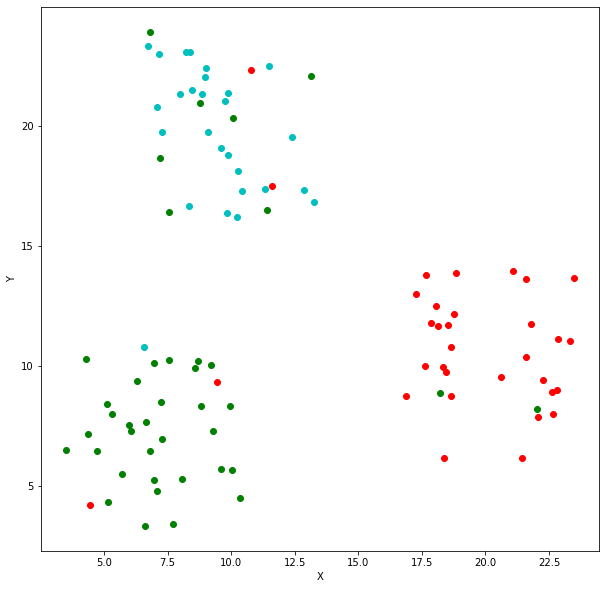

Закончена эпоха 18


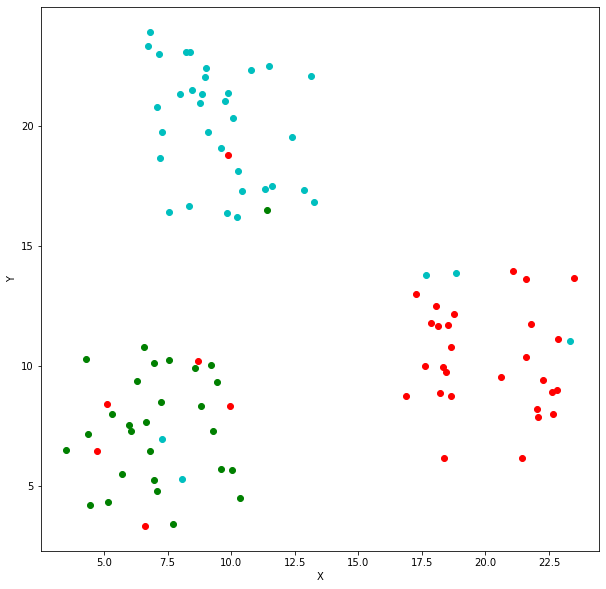

Закончена эпоха 19


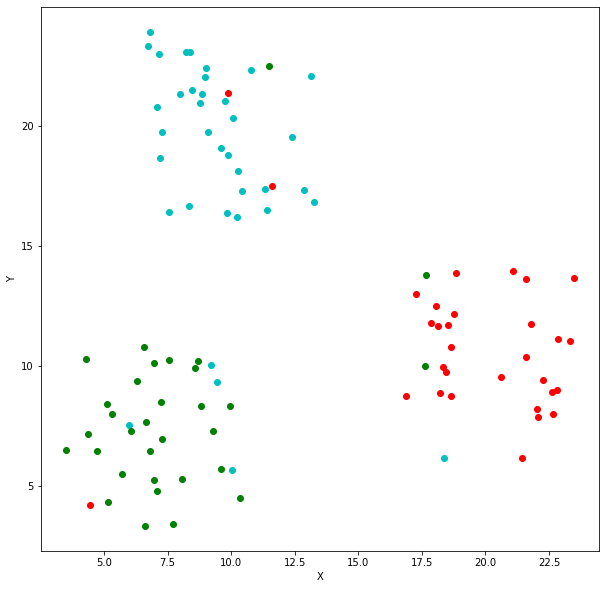

Закончена эпоха 20


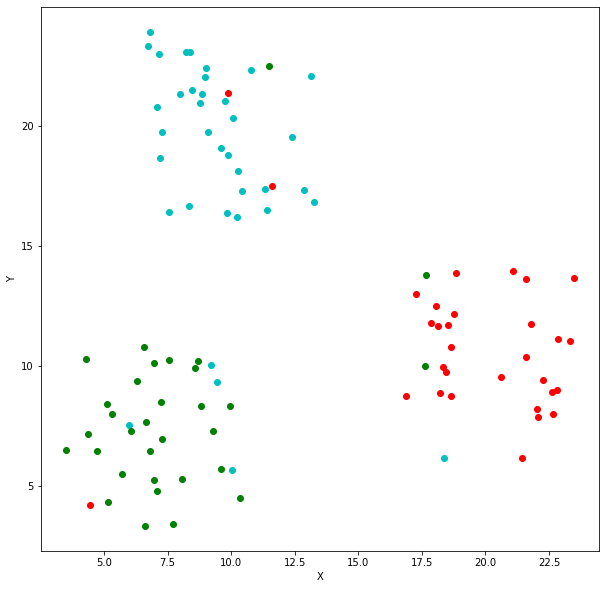

Закончена эпоха 21


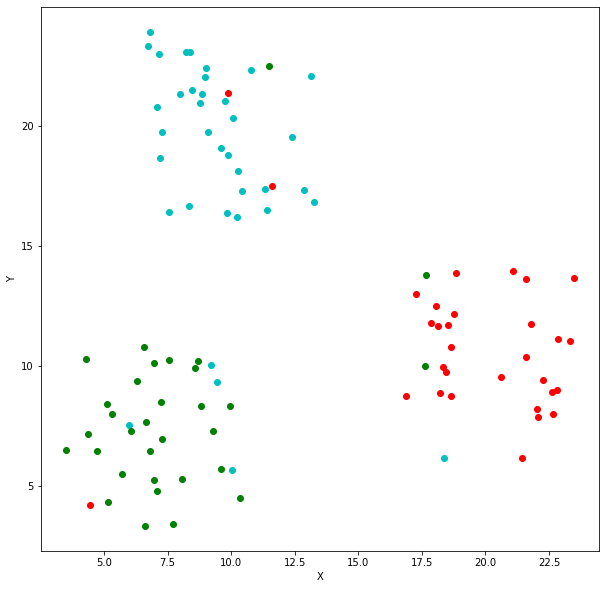

Закончена эпоха 22


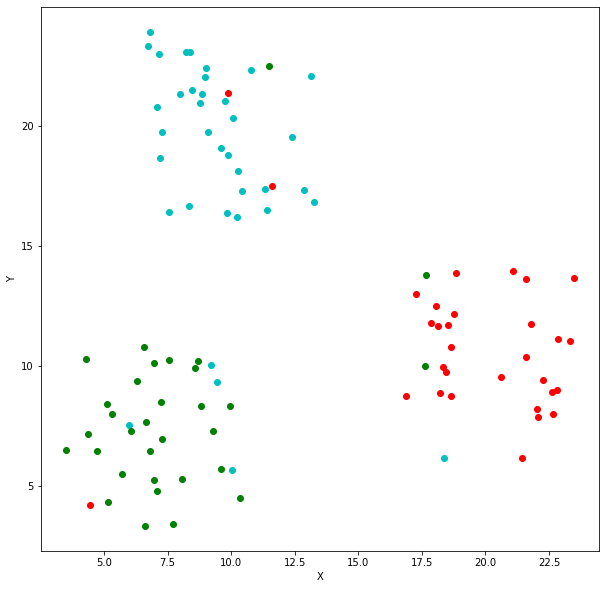

Закончена эпоха 23


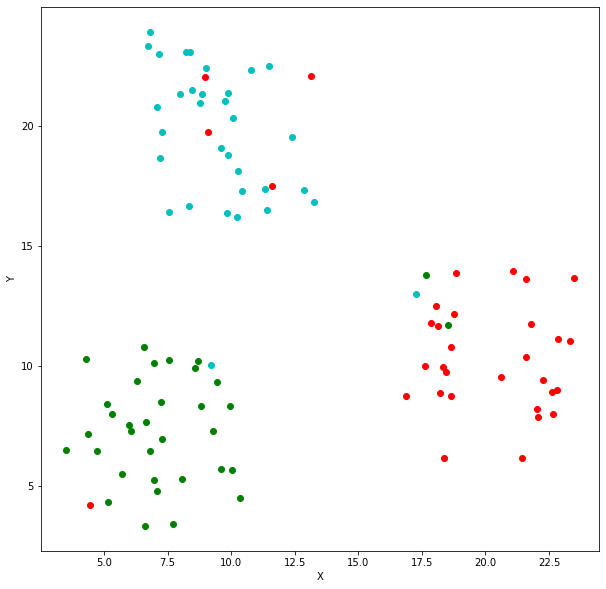

Закончена эпоха 24


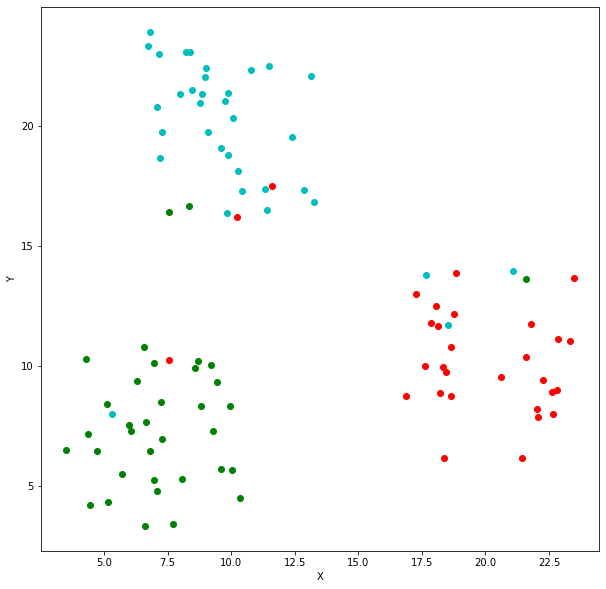

Закончена эпоха 25


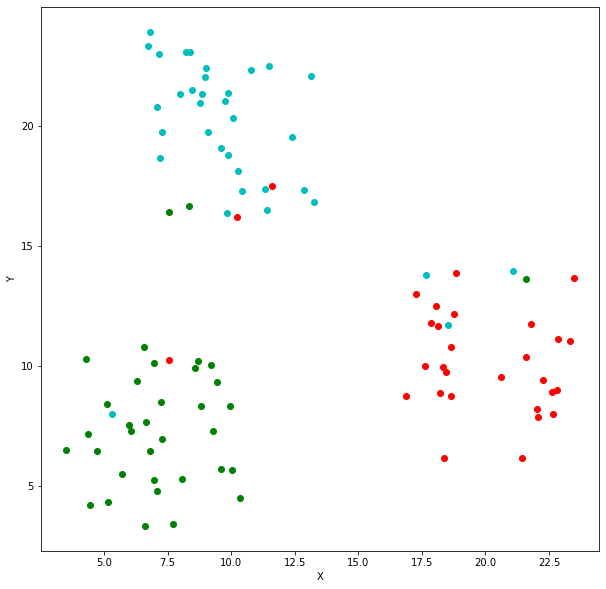

Закончена эпоха 26


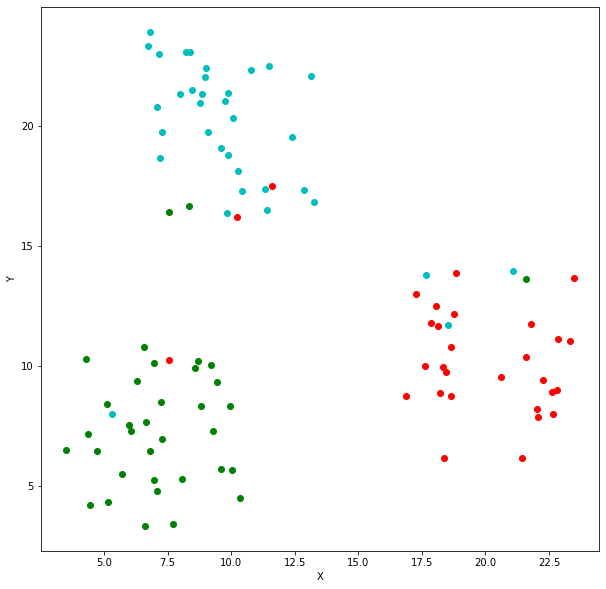

Закончена эпоха 27


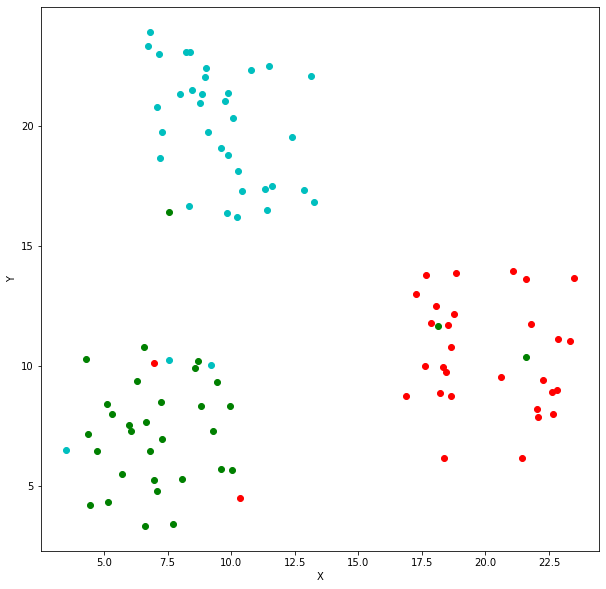

Закончена эпоха 28


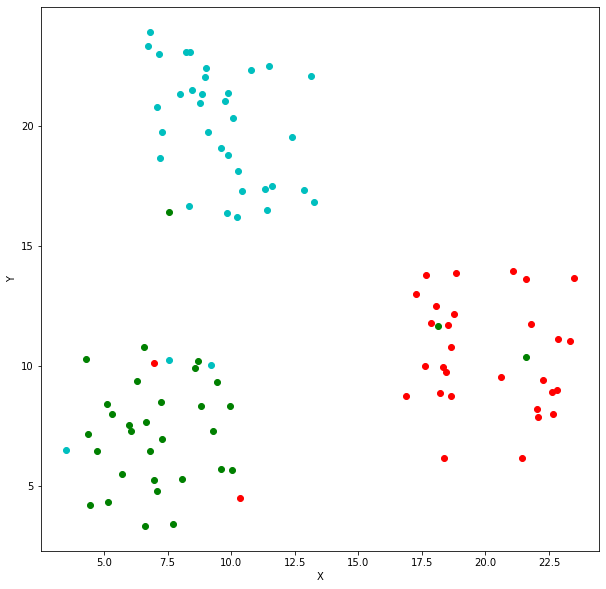

Закончена эпоха 29


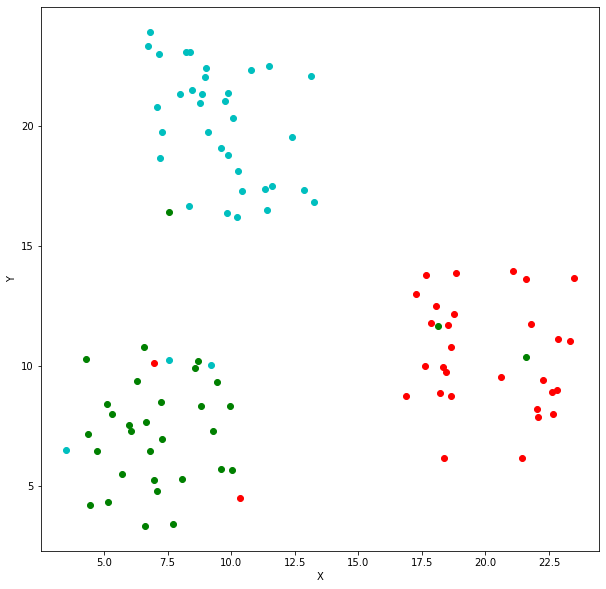

Закончена эпоха 30


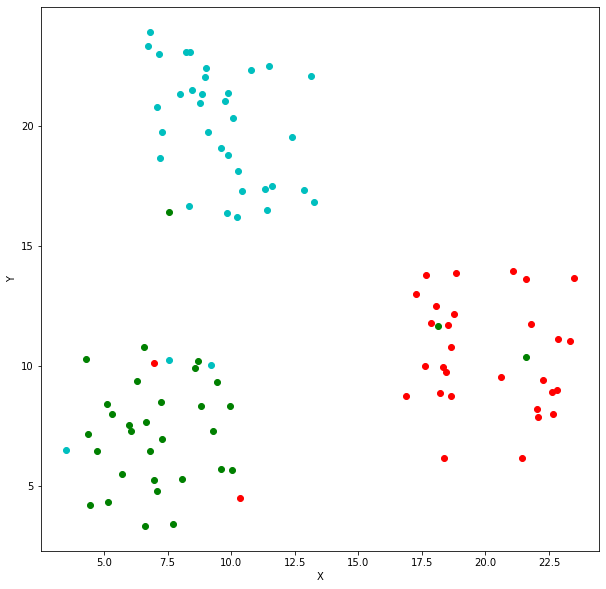

Закончена эпоха 31


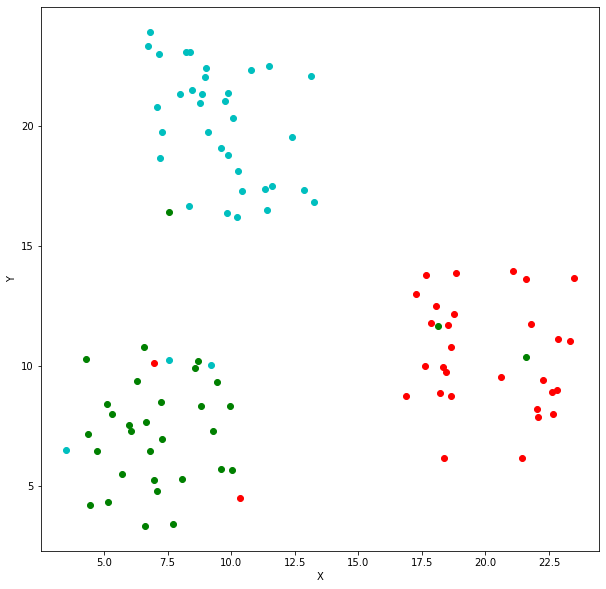

Закончена эпоха 32


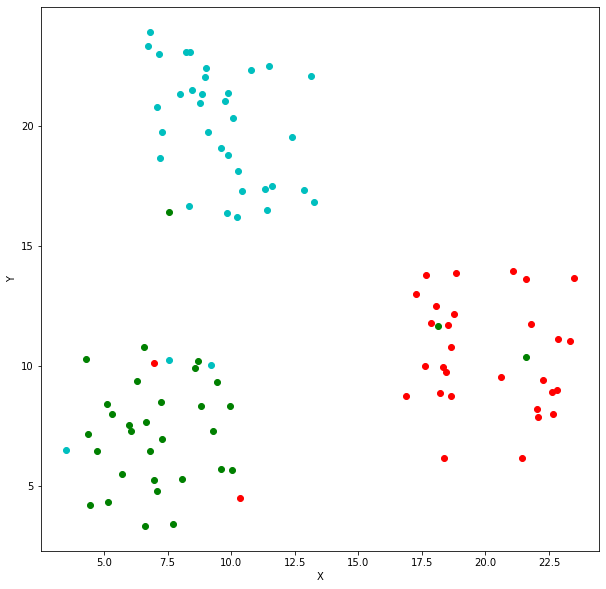

Закончена эпоха 33


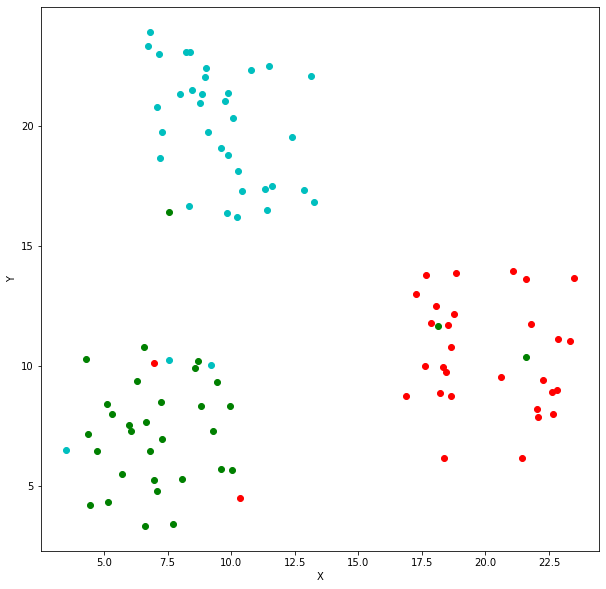

Закончена эпоха 34


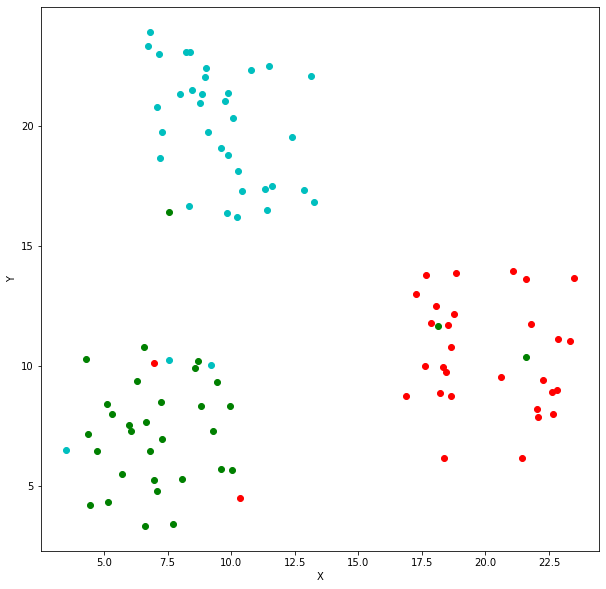

Закончена эпоха 35


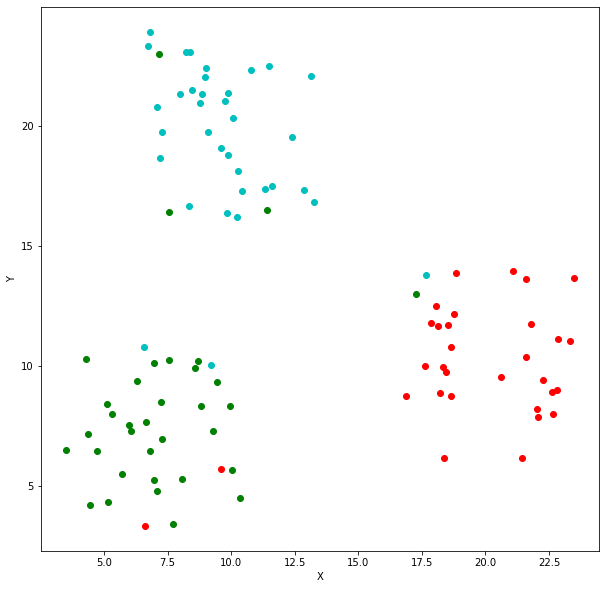

Закончена эпоха 36


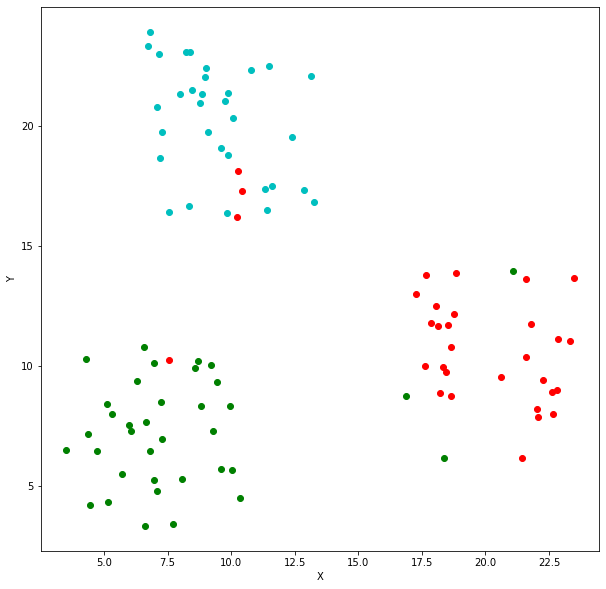

Закончена эпоха 37


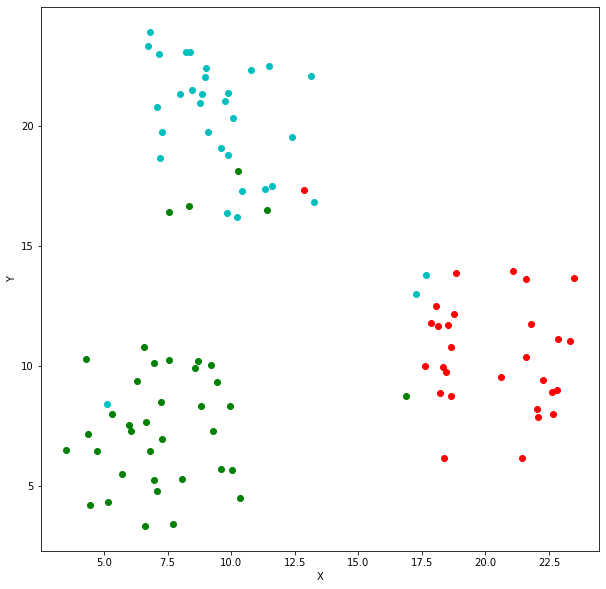

Закончена эпоха 38


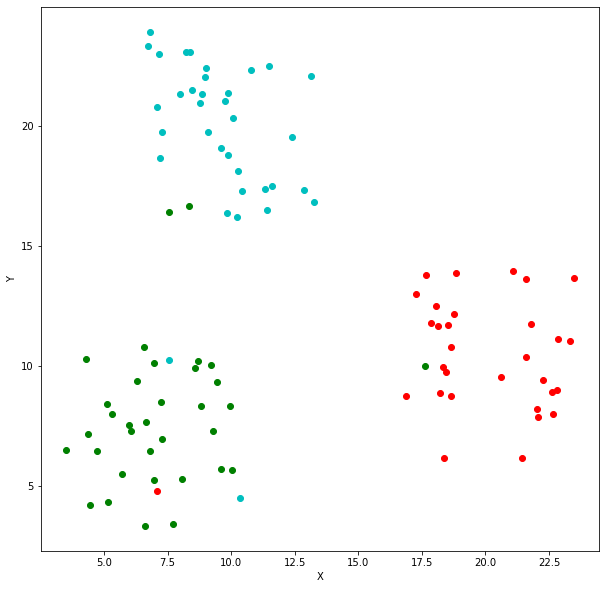

Закончена эпоха 39


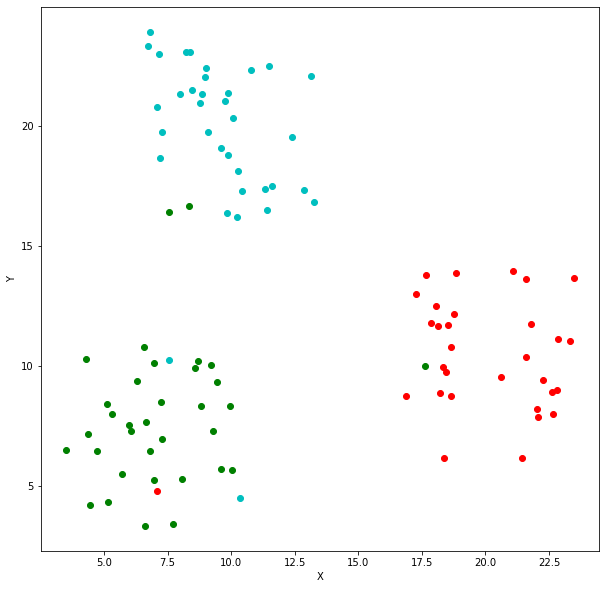

Закончена эпоха 40


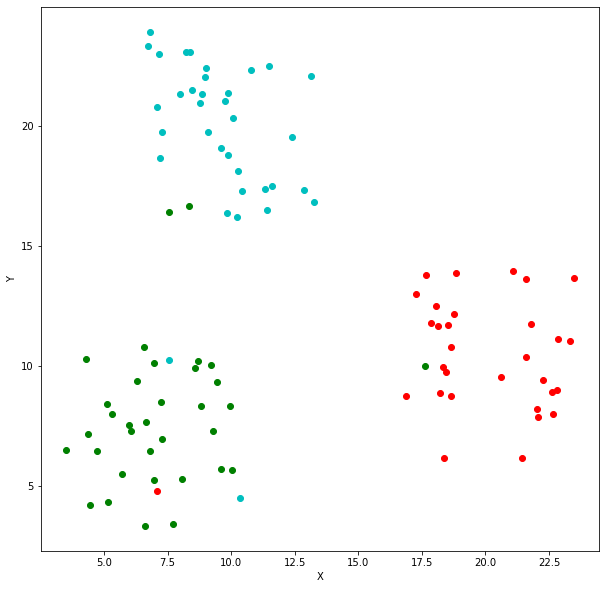

Закончена эпоха 41


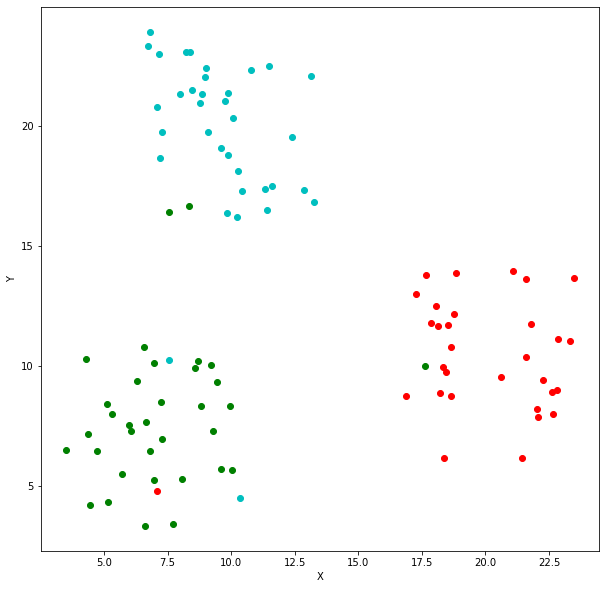

Закончена эпоха 42


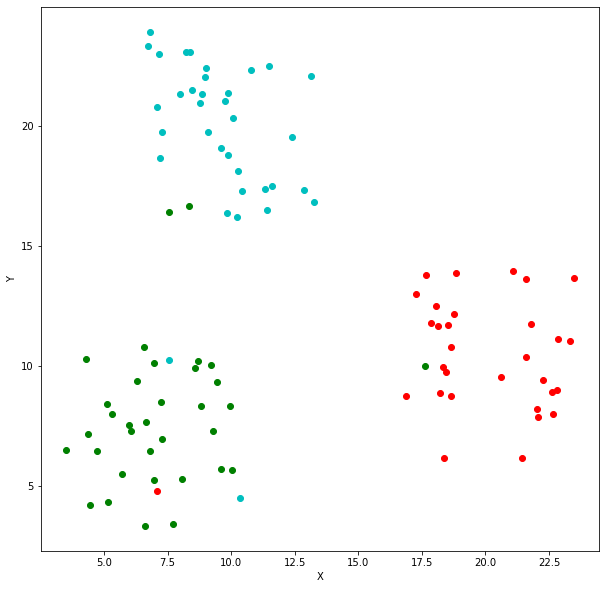

Закончена эпоха 43


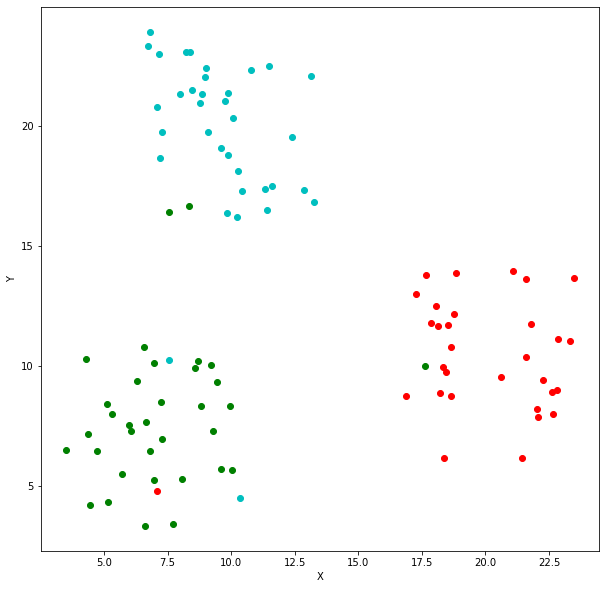

Закончена эпоха 44


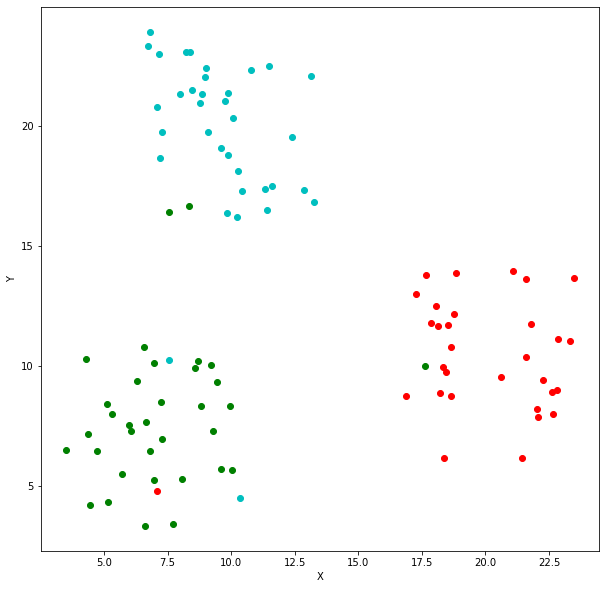

Закончена эпоха 45


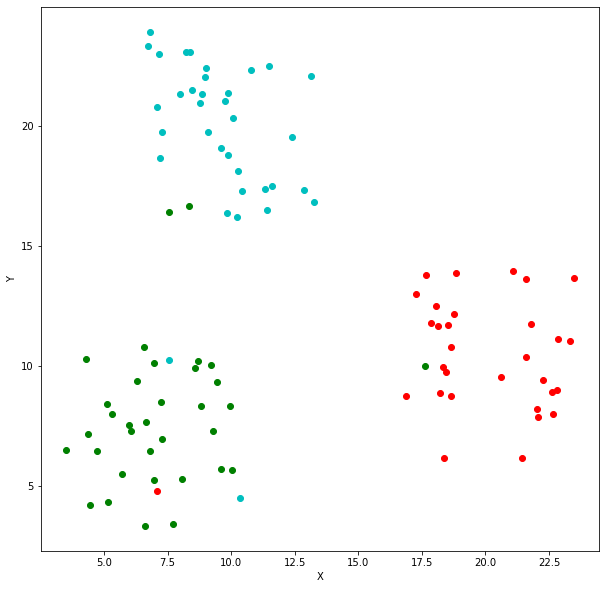

Закончена эпоха 46


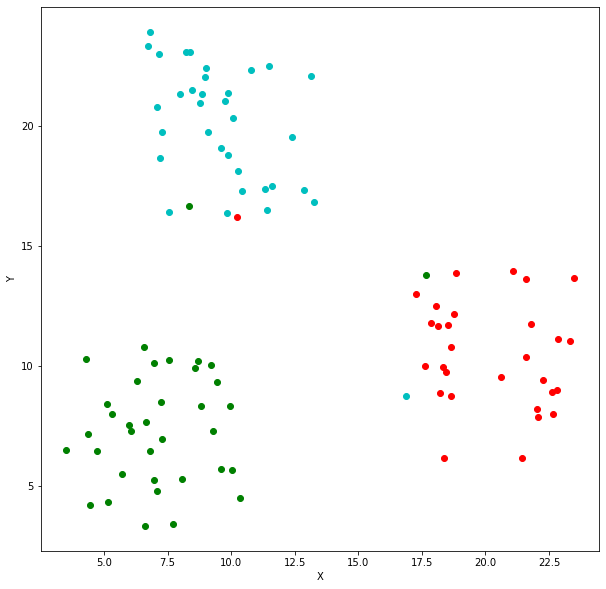

Закончена эпоха 47


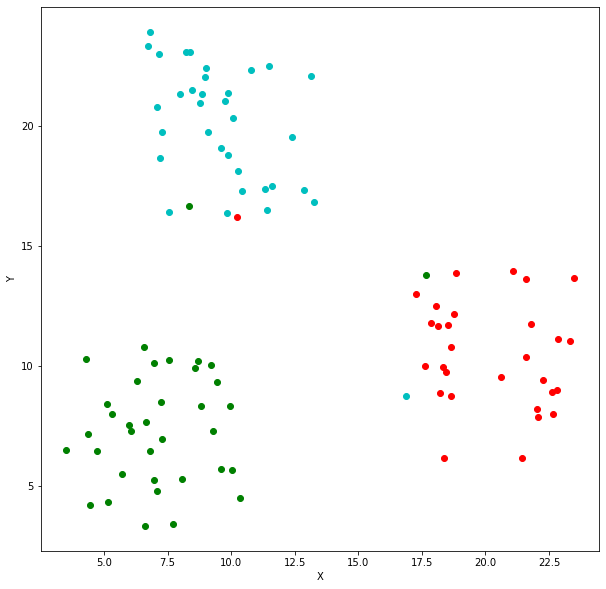

Закончена эпоха 48


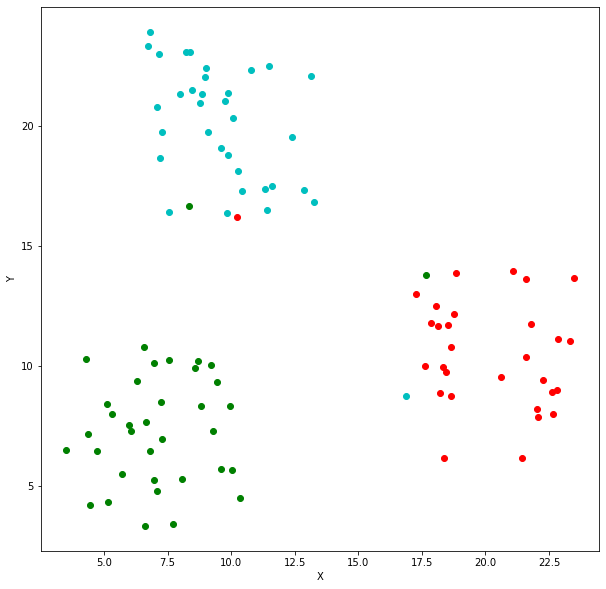

Закончена эпоха 49


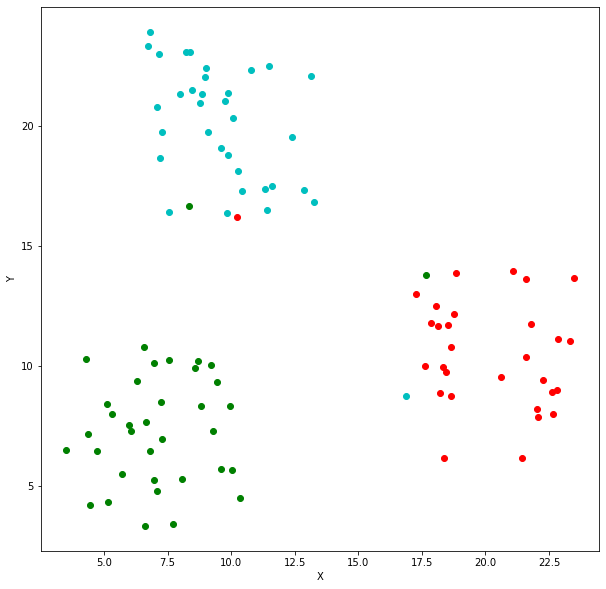

Закончена эпоха 50


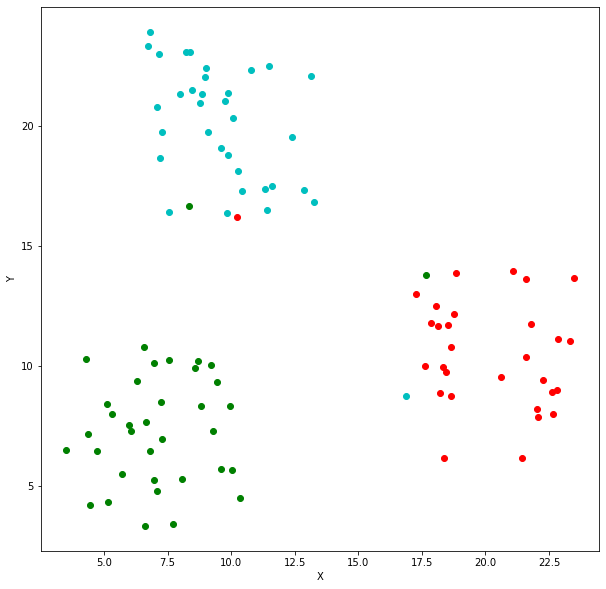

Закончена эпоха 51


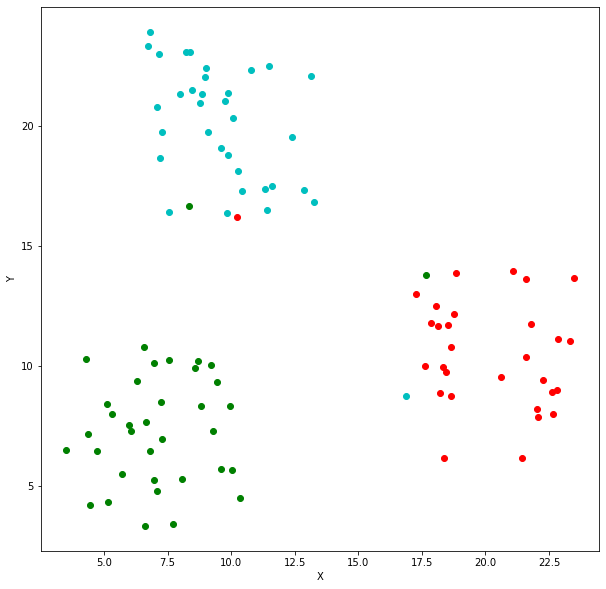

Закончена эпоха 52


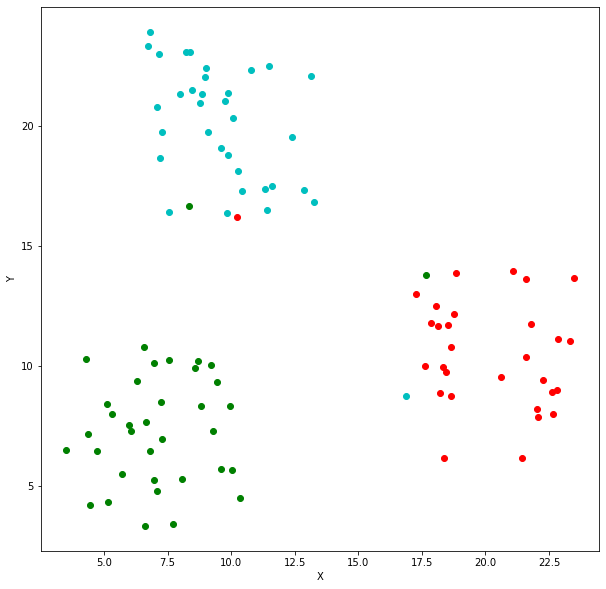

Закончена эпоха 53


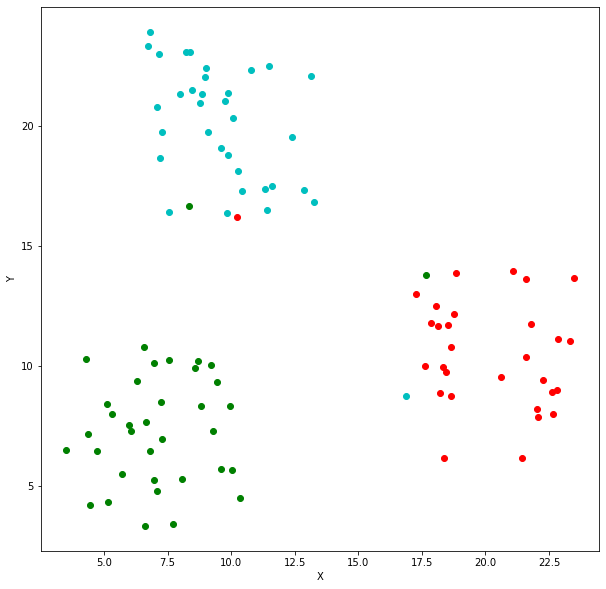

Закончена эпоха 54


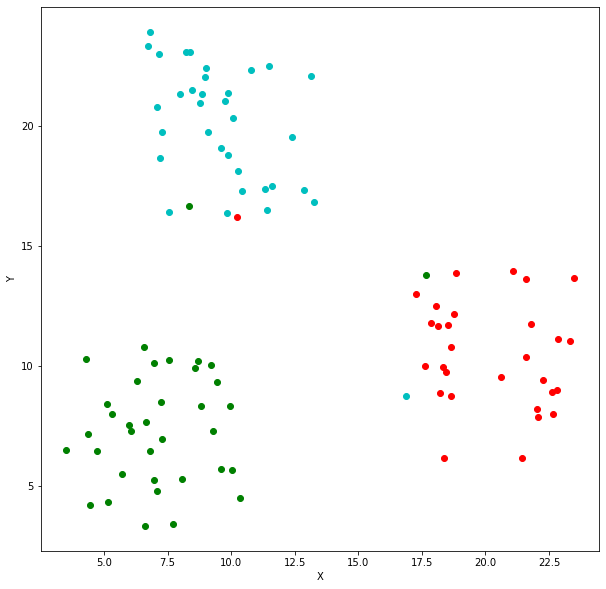

Закончена эпоха 55


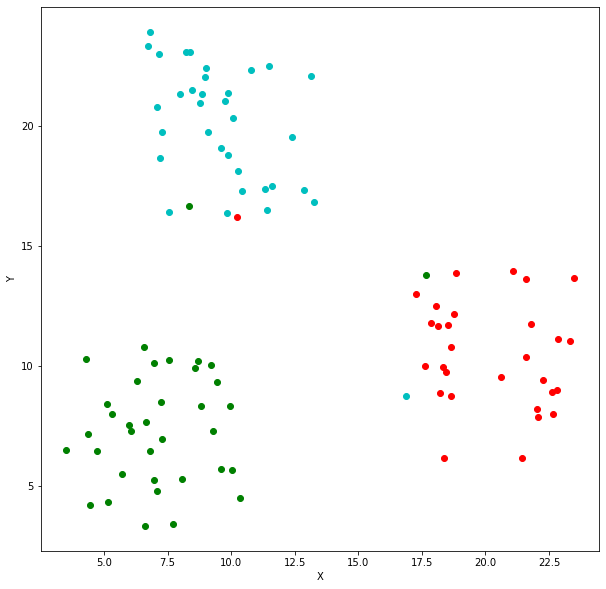

Закончена эпоха 56


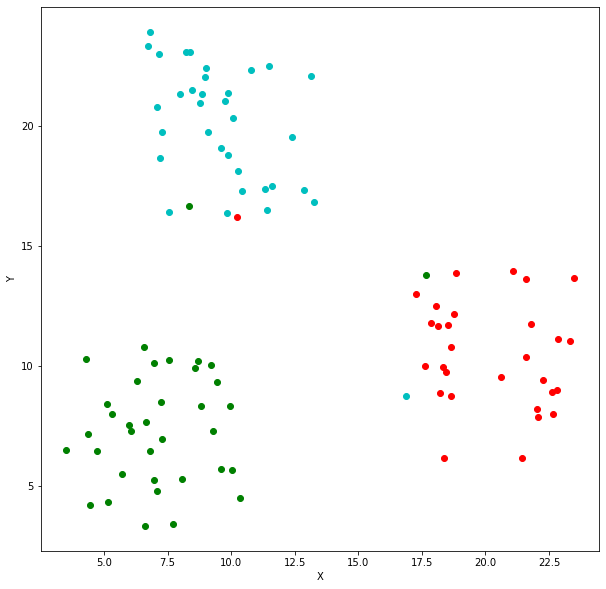

Закончена эпоха 57


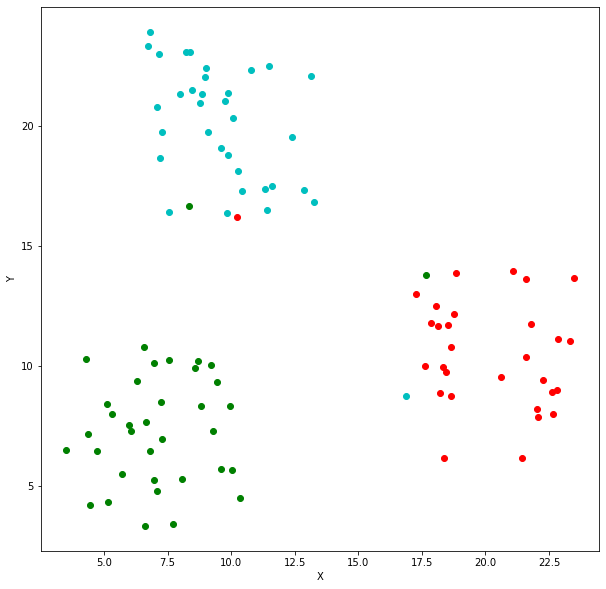

Закончена эпоха 58


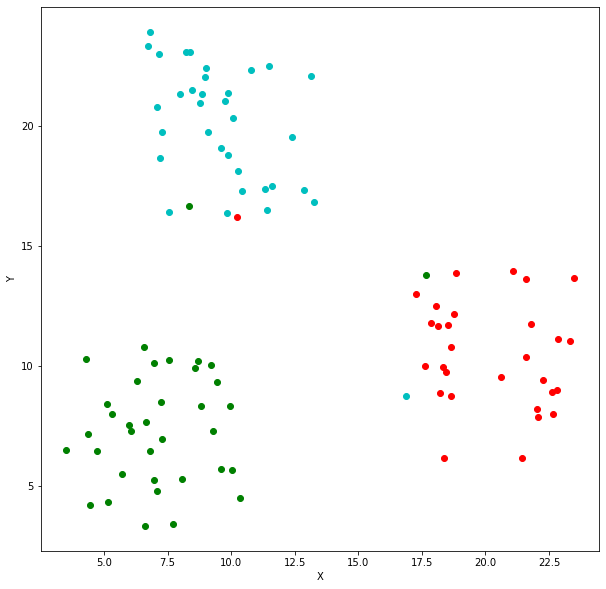

Закончена эпоха 59


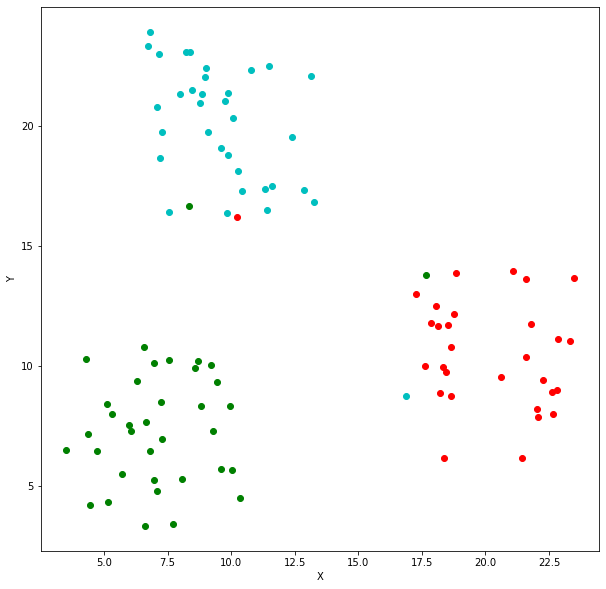

Закончена эпоха 60


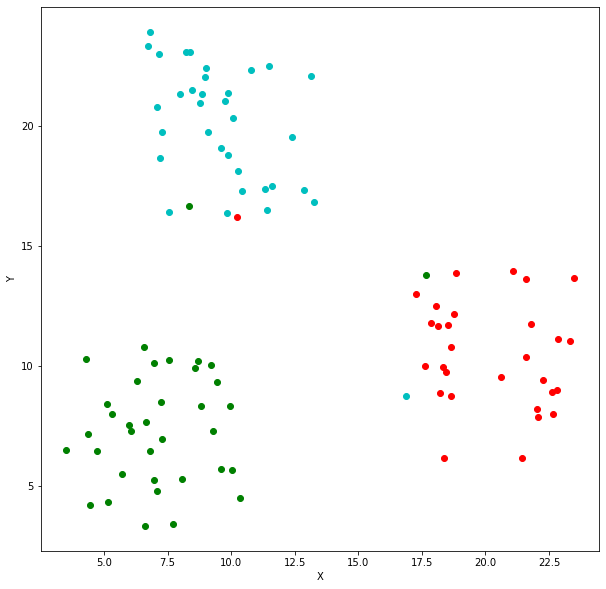

Закончена эпоха 61


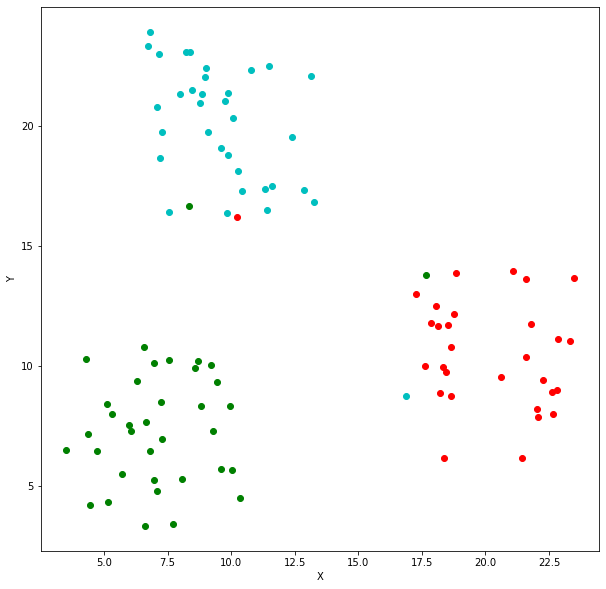

Закончена эпоха 62


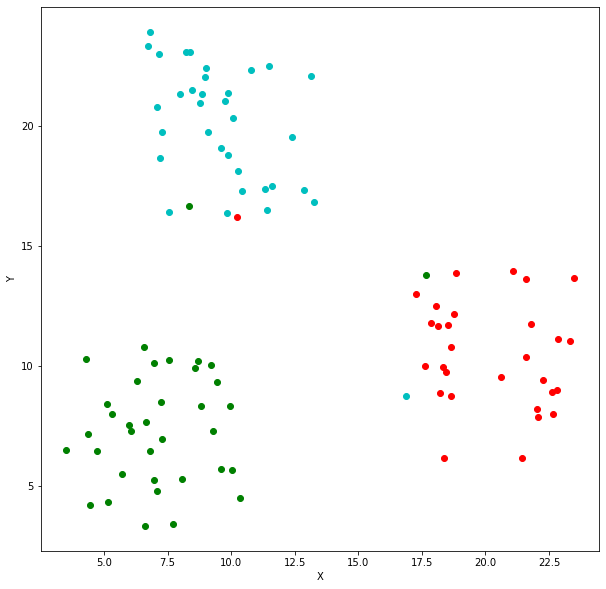

Закончена эпоха 63


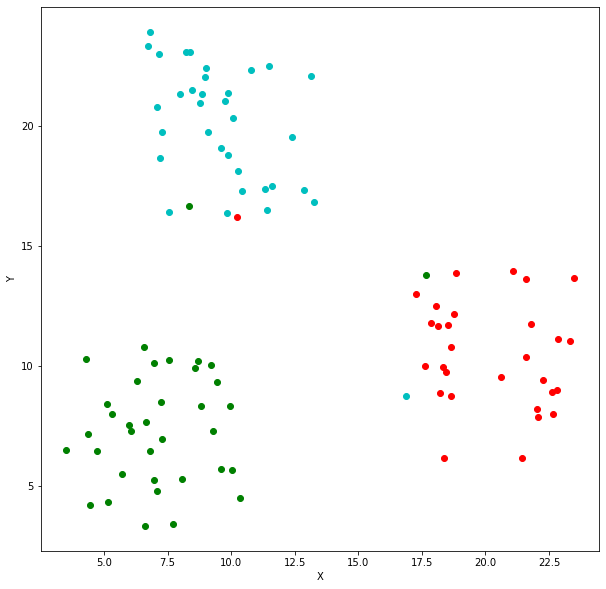

Закончена эпоха 64


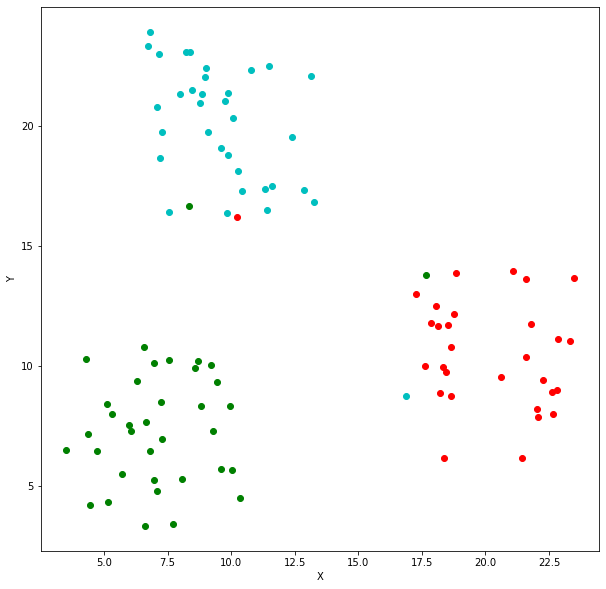

Закончена эпоха 65


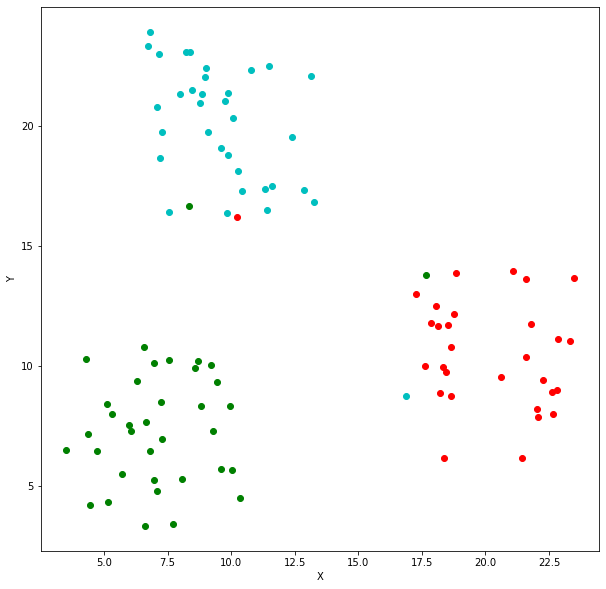

Закончена эпоха 66


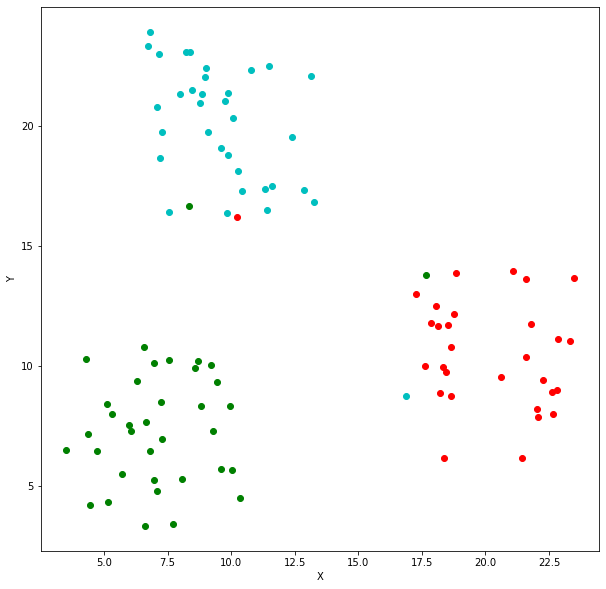

Закончена эпоха 67


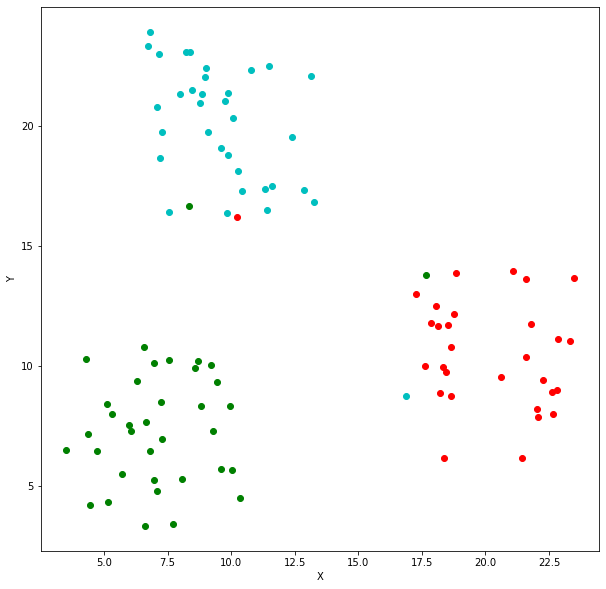

Закончена эпоха 68


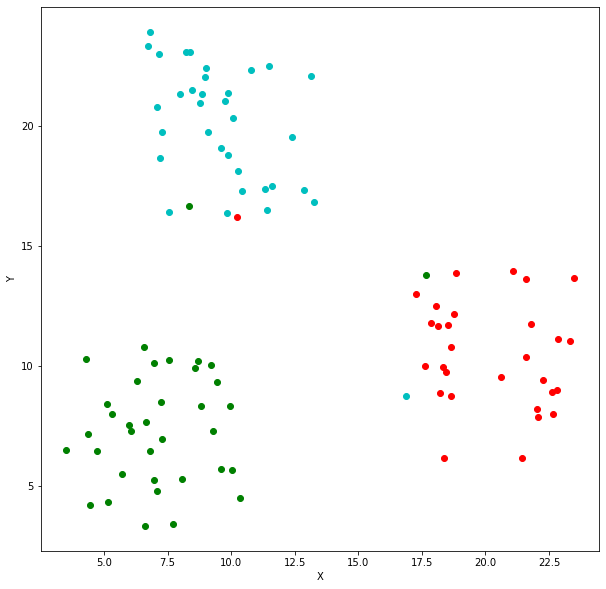

Закончена эпоха 69


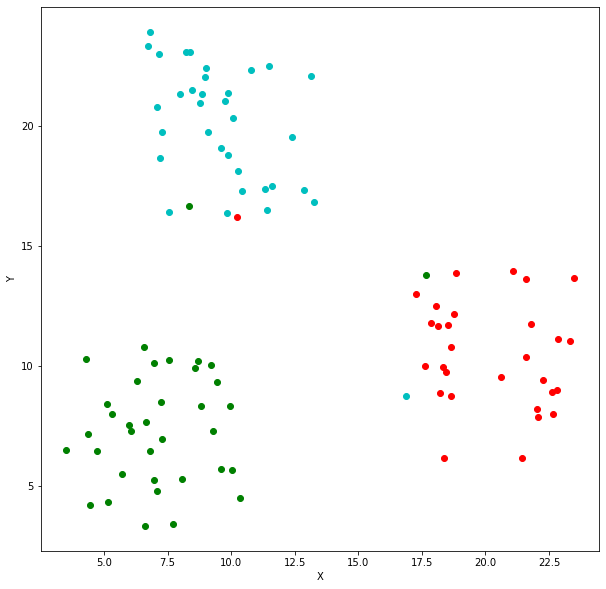

Закончена эпоха 70


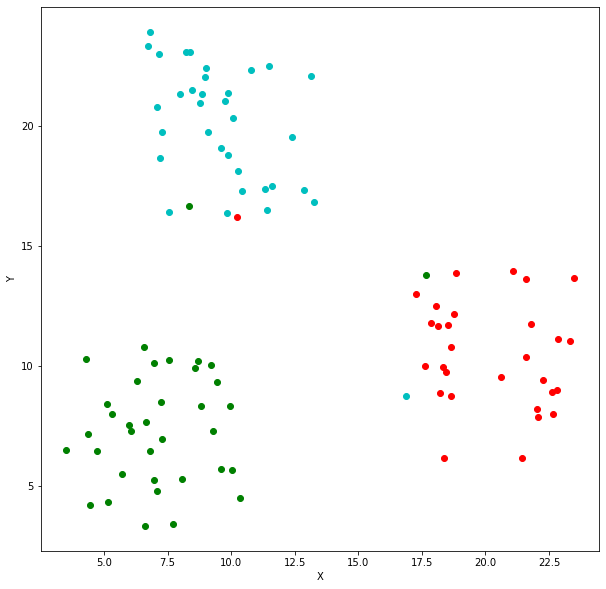

Закончена эпоха 71


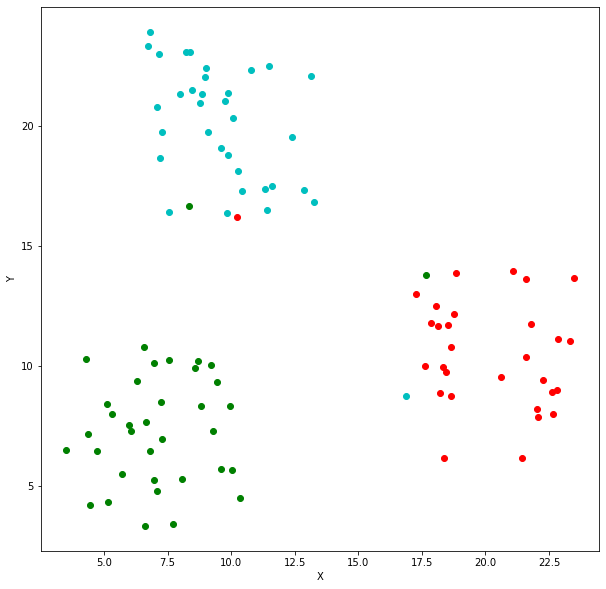

Закончена эпоха 72


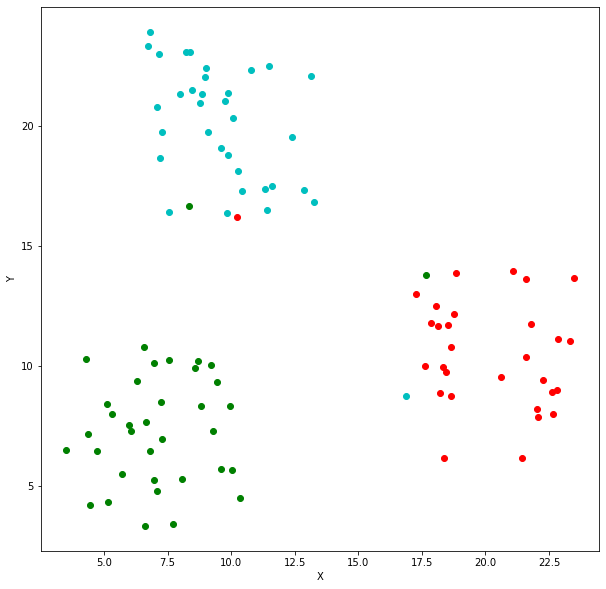

Закончена эпоха 73


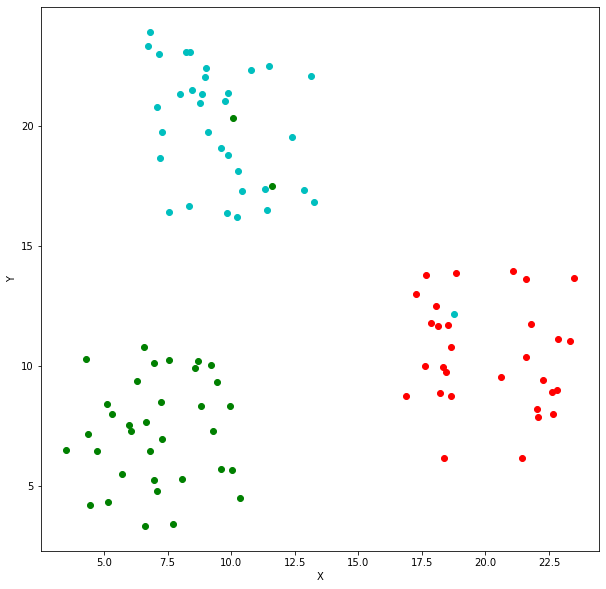

Закончена эпоха 74


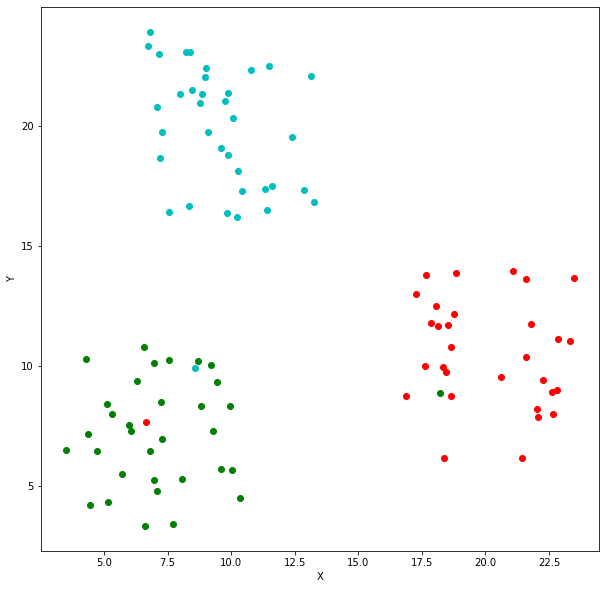

Закончена эпоха 75


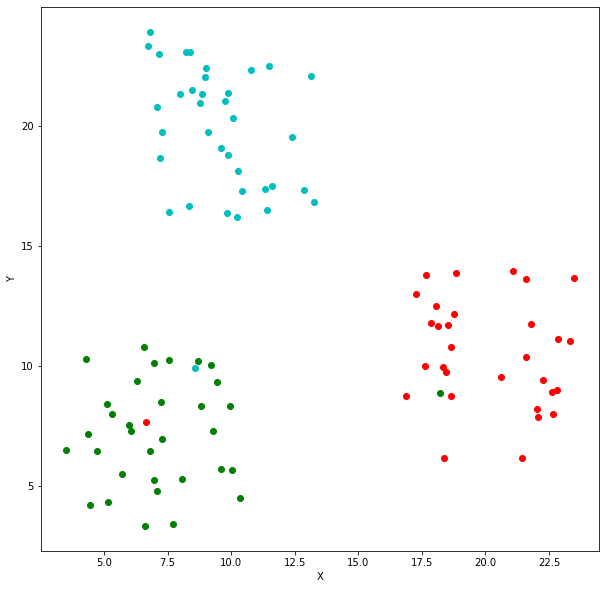

Закончена эпоха 76


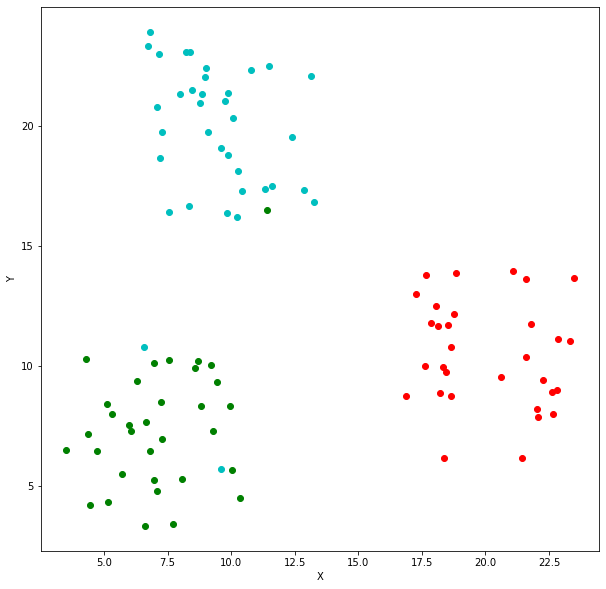

Закончена эпоха 77


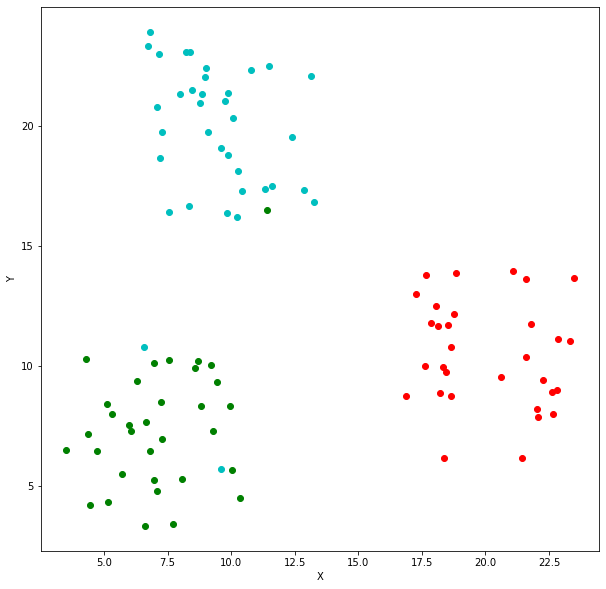

Закончена эпоха 78


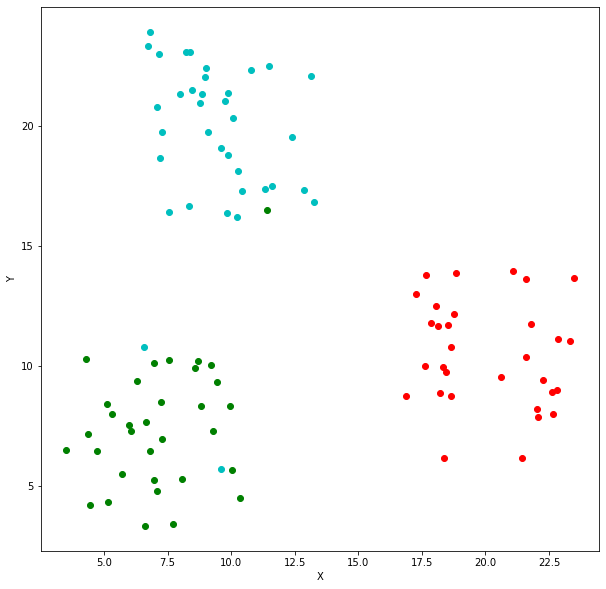

Закончена эпоха 79


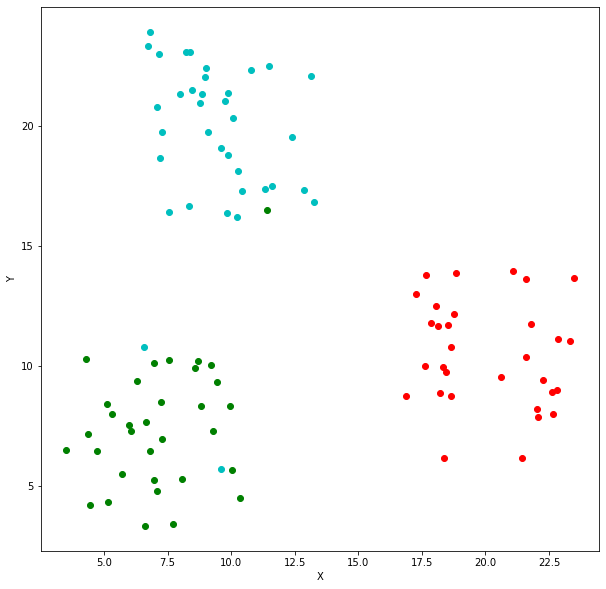

Закончена эпоха 80


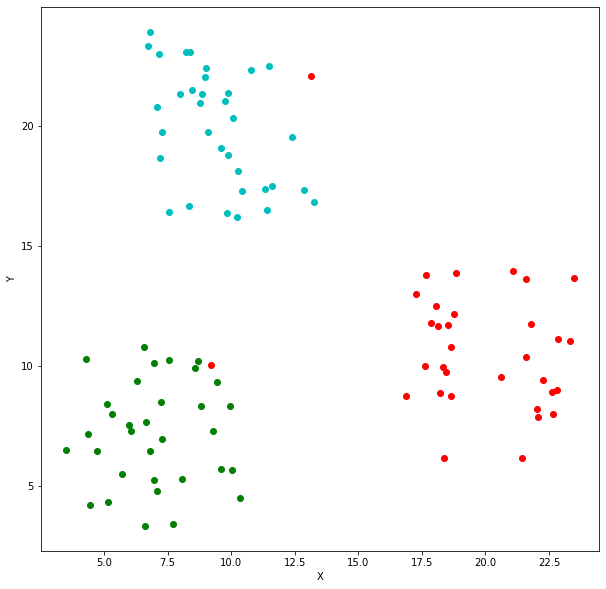

Закончена эпоха 81


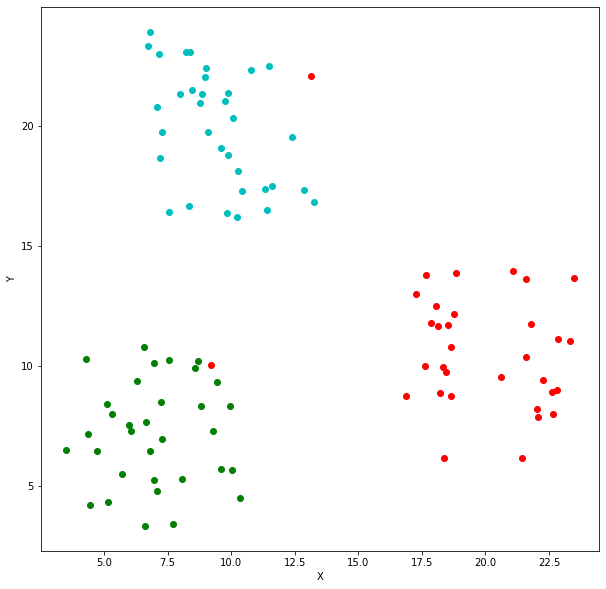

Закончена эпоха 82


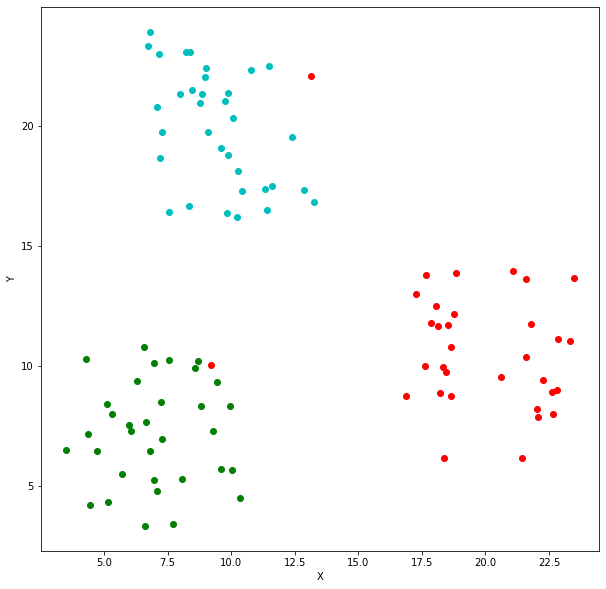

Закончена эпоха 83


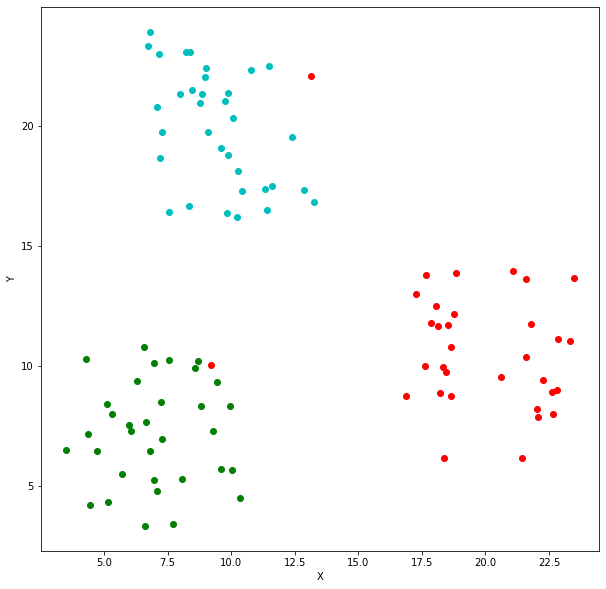

Закончена эпоха 84


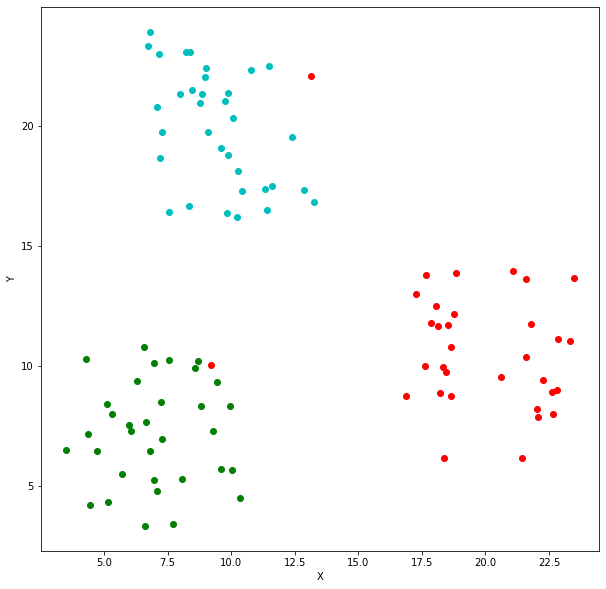

Закончена эпоха 85


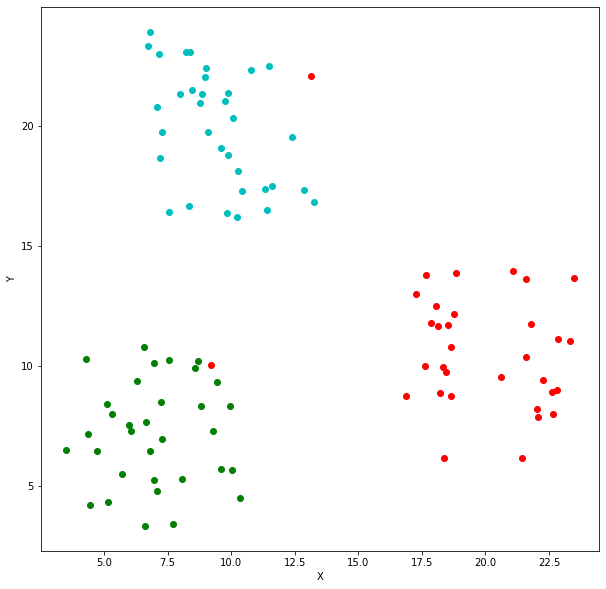

Закончена эпоха 86


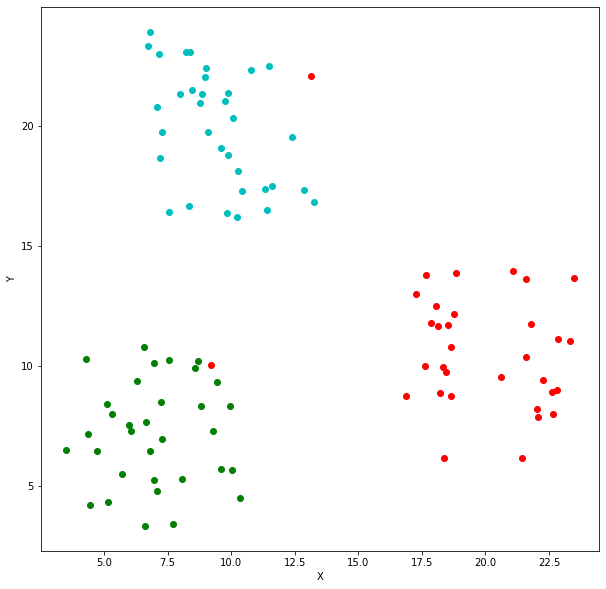

Закончена эпоха 87


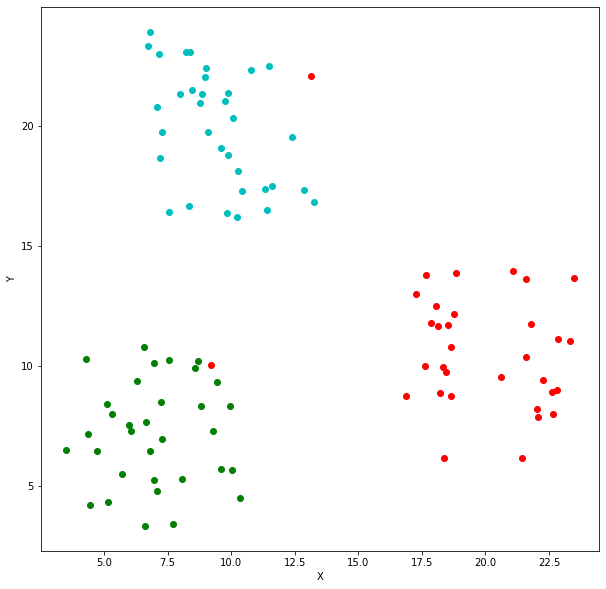

Закончена эпоха 88


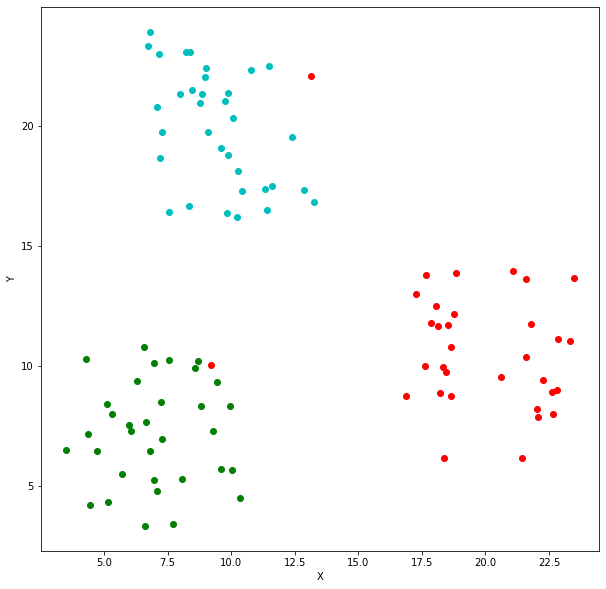

Закончена эпоха 89


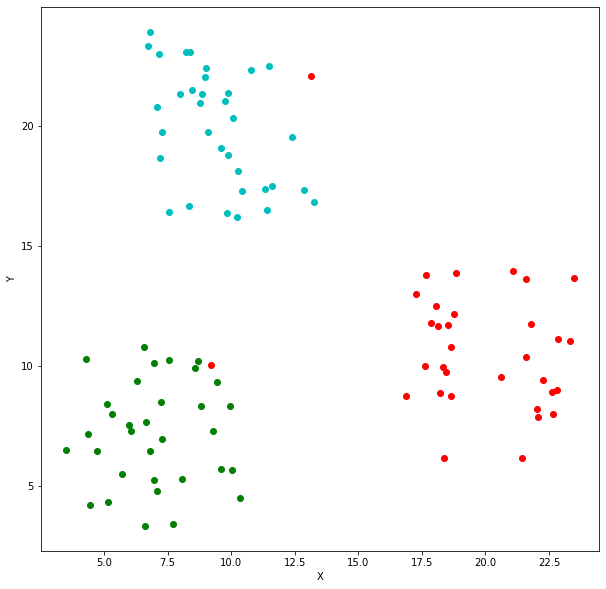

Закончена эпоха 90


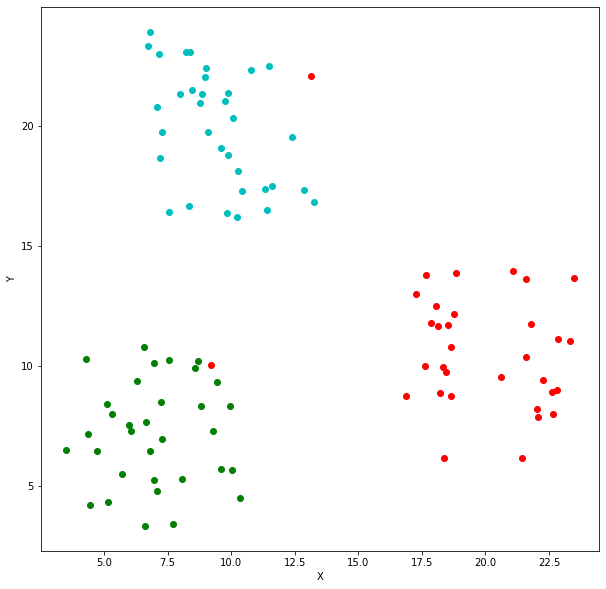

Закончена эпоха 91


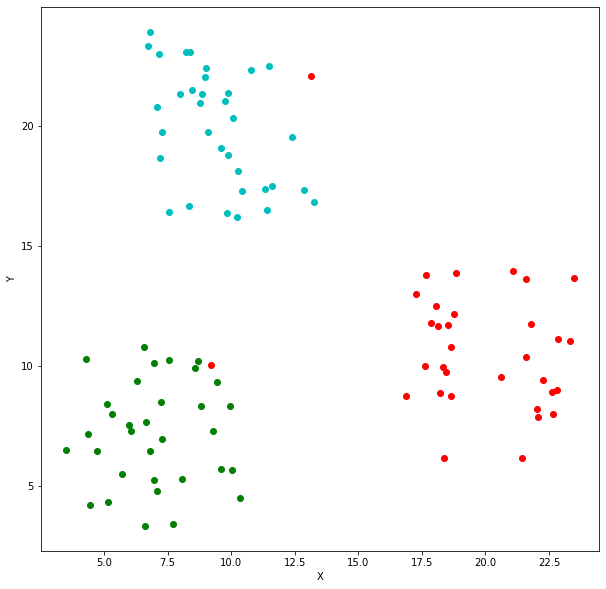

Закончена эпоха 92


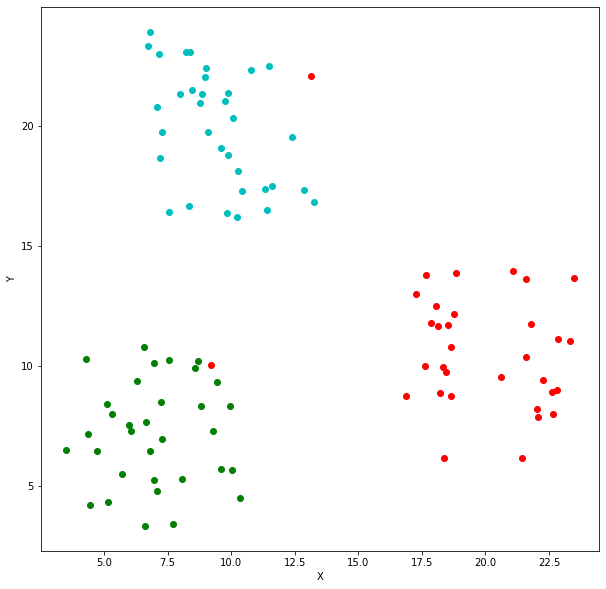

Закончена эпоха 93


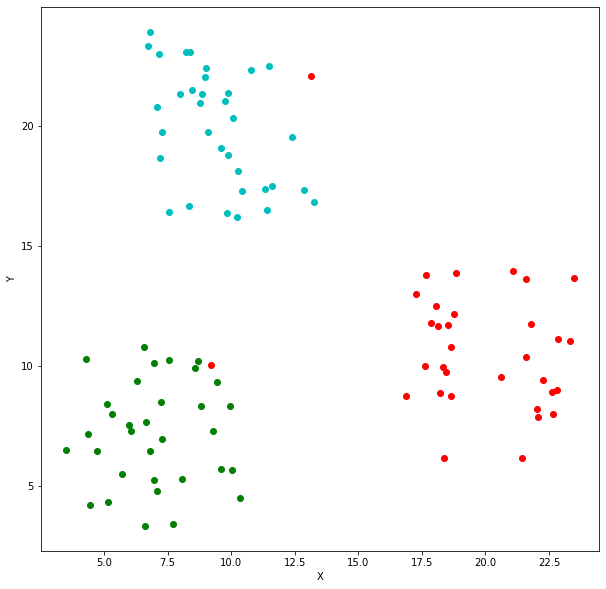

Закончена эпоха 94


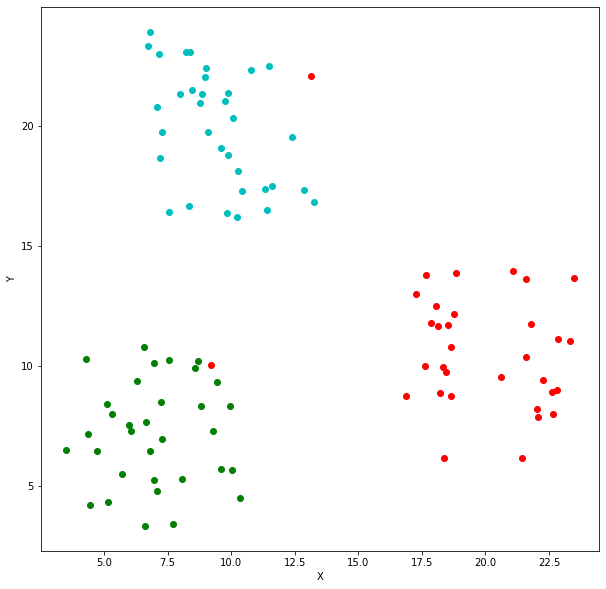

Закончена эпоха 95


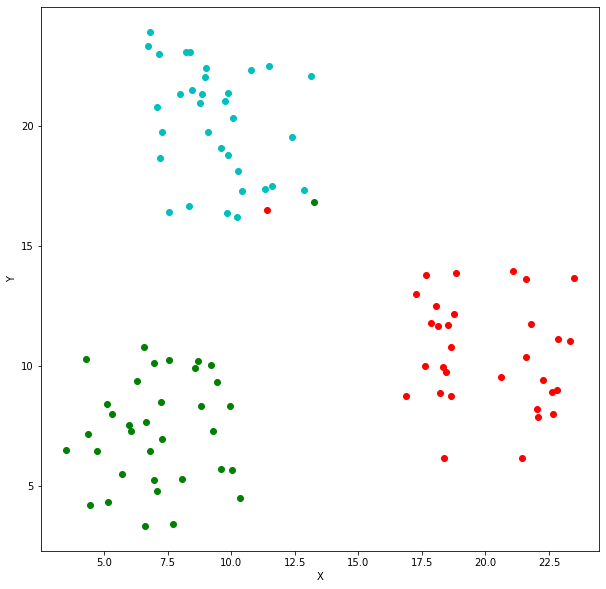

Закончена эпоха 96


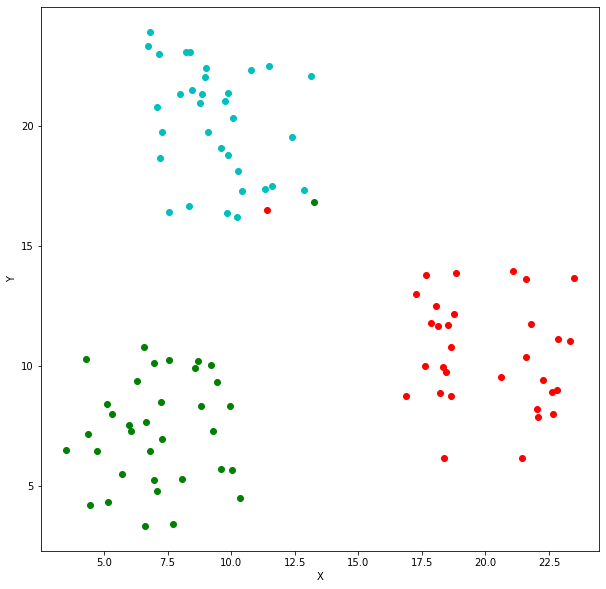

Закончена эпоха 97


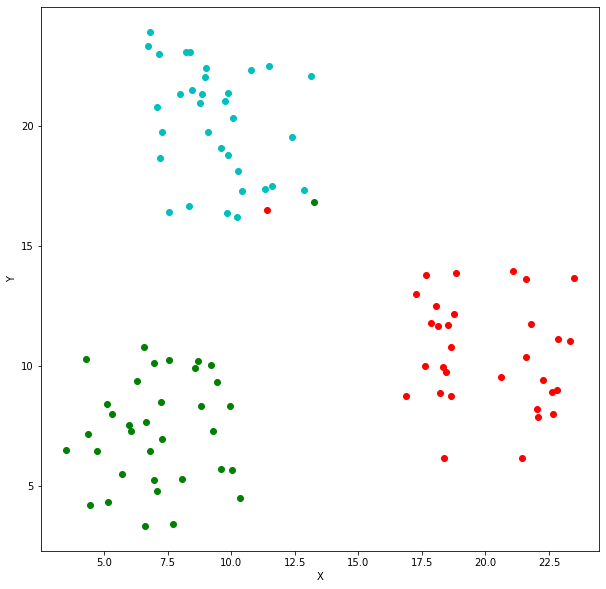

Закончена эпоха 98


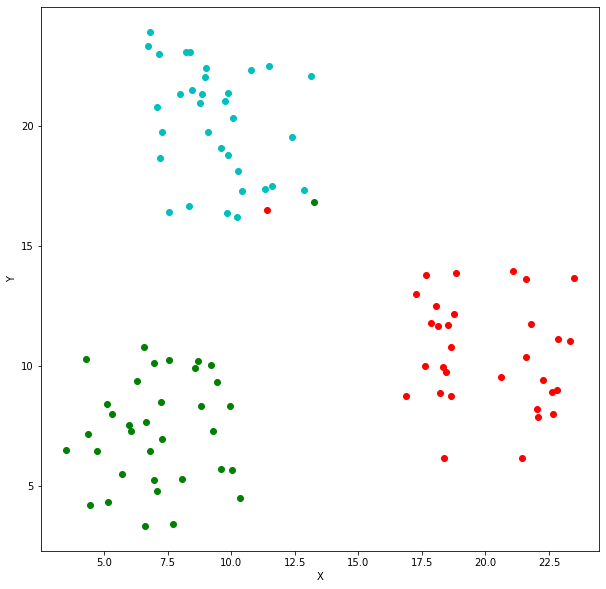

Закончена эпоха 99


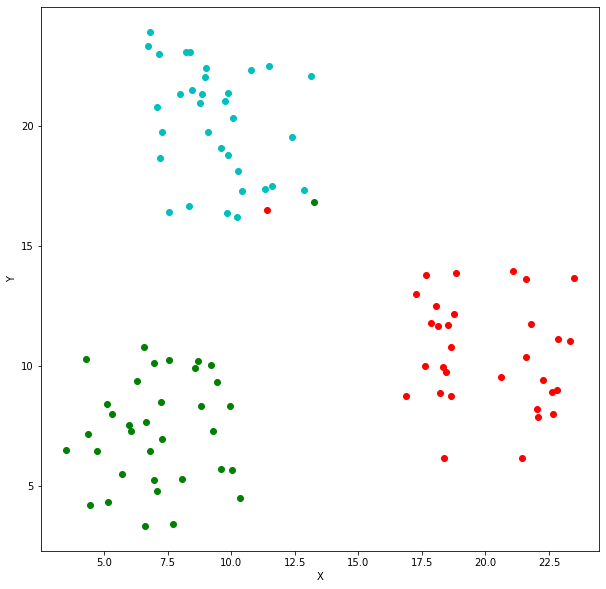

Закончена эпоха 100


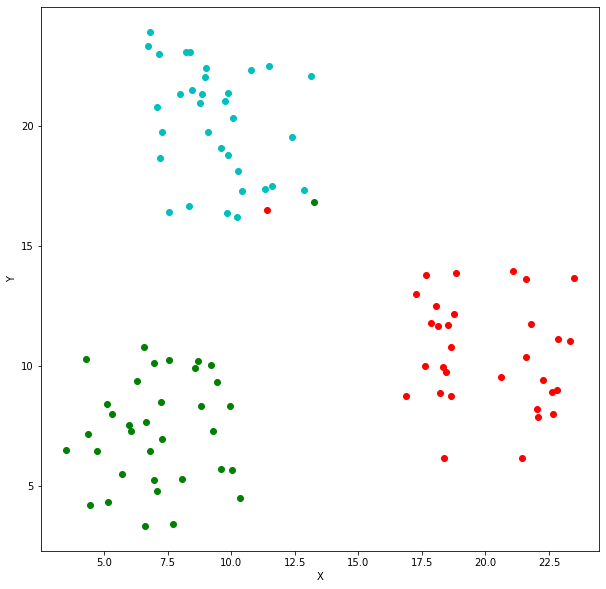

Закончена эпоха 101


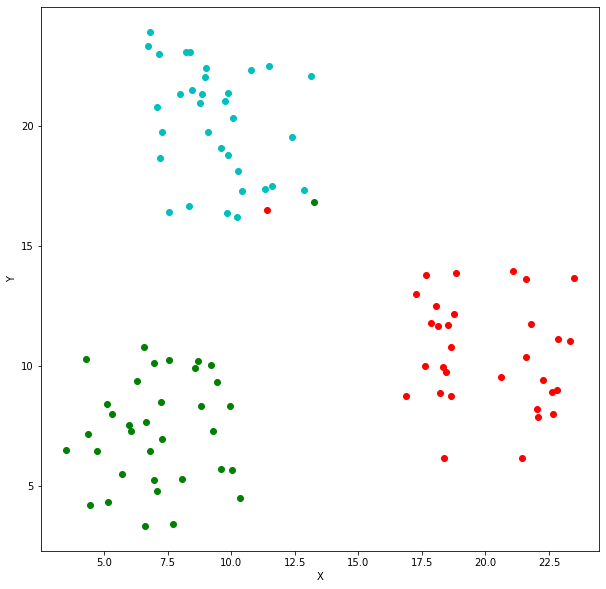

Закончена эпоха 102


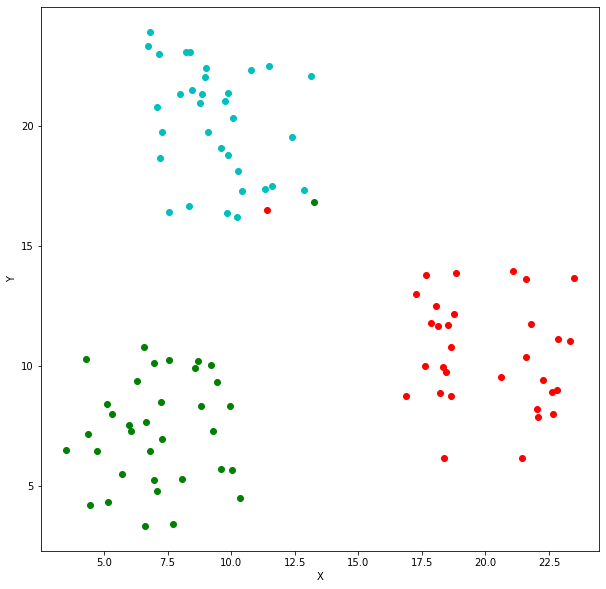

Закончена эпоха 103


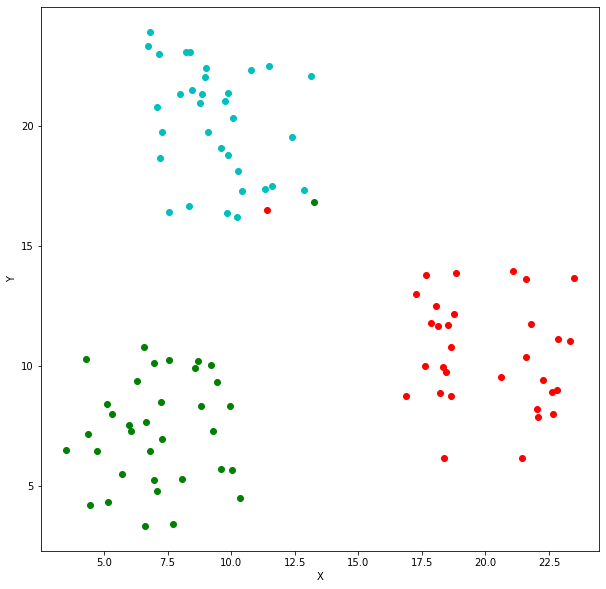

Закончена эпоха 104


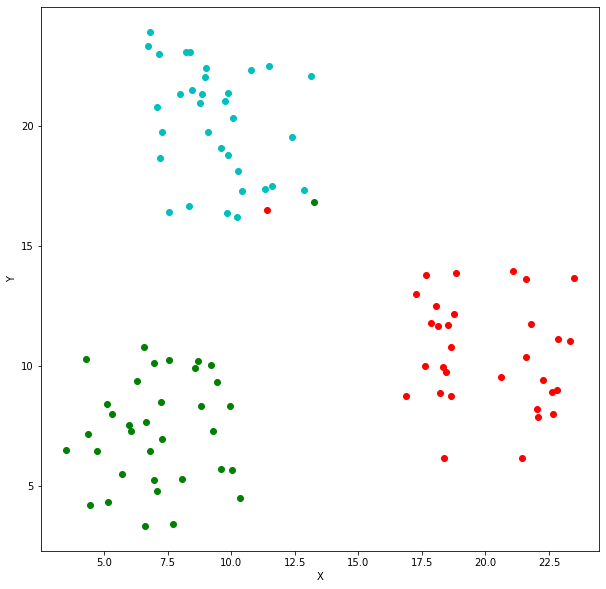

Закончена эпоха 105


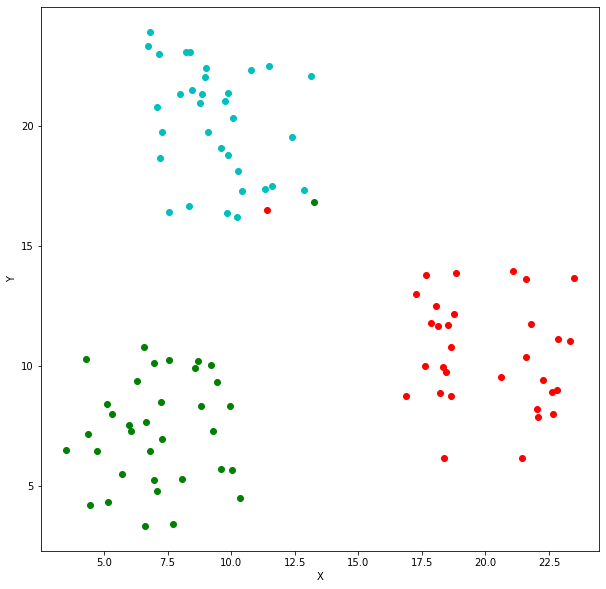

Закончена эпоха 106


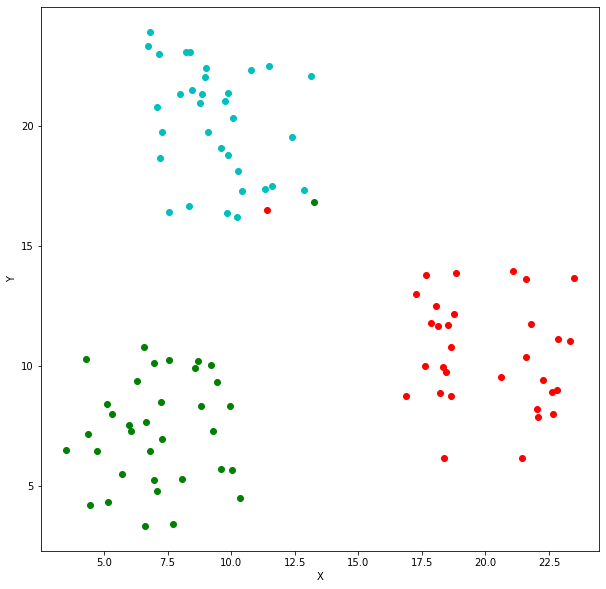

Закончена эпоха 107


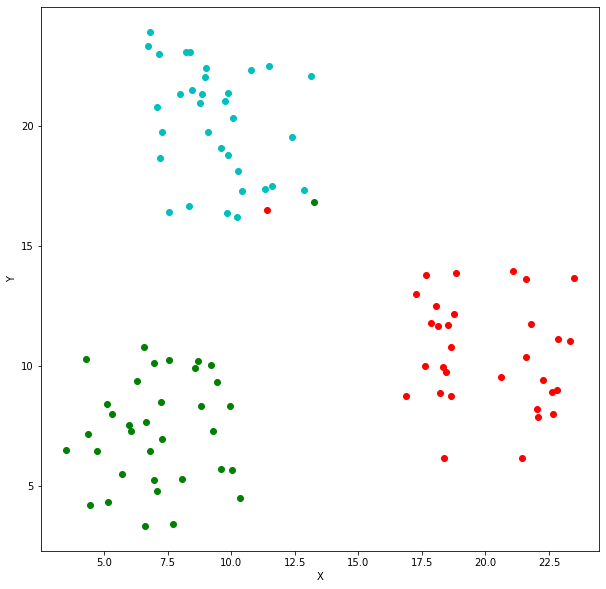

Закончена эпоха 108


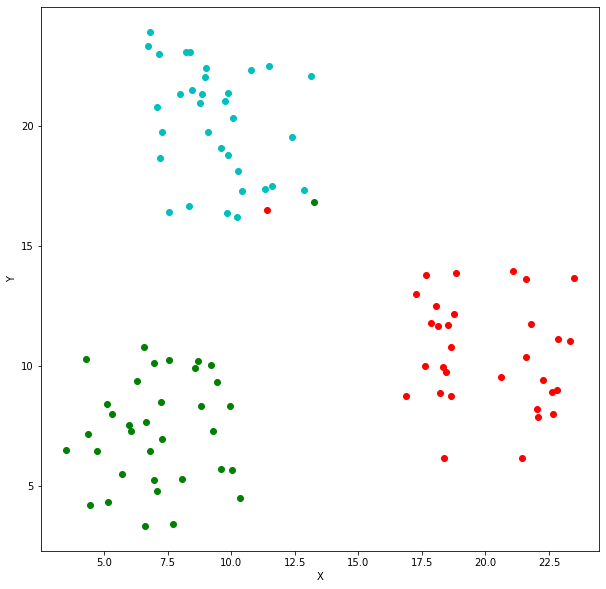

Закончена эпоха 109


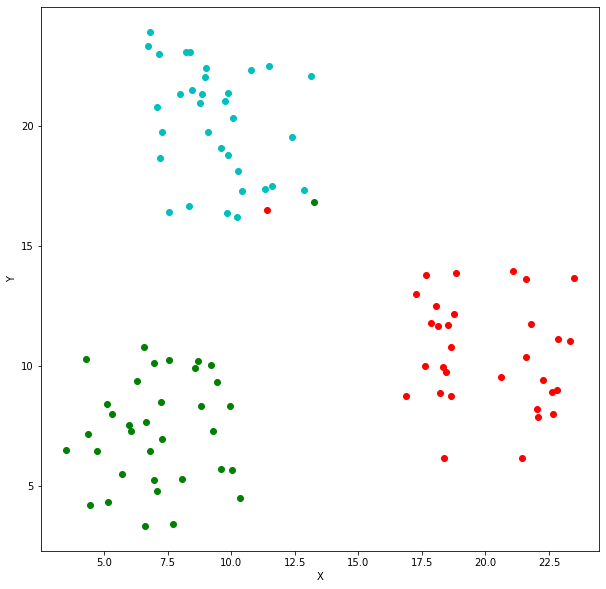

Закончена эпоха 110


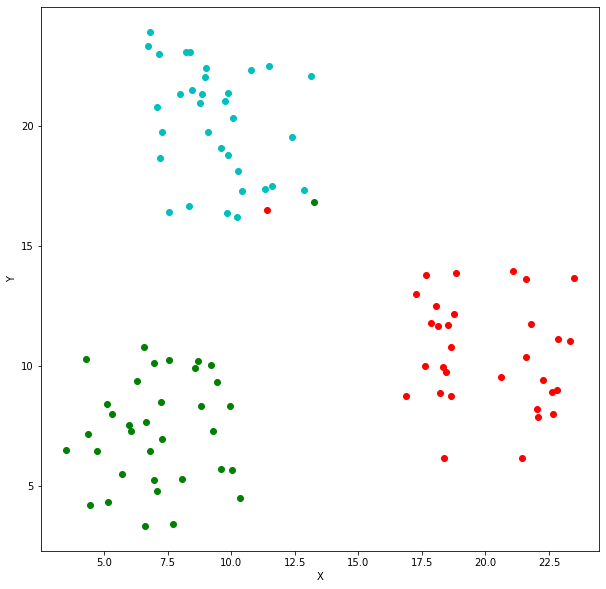

Закончена эпоха 111


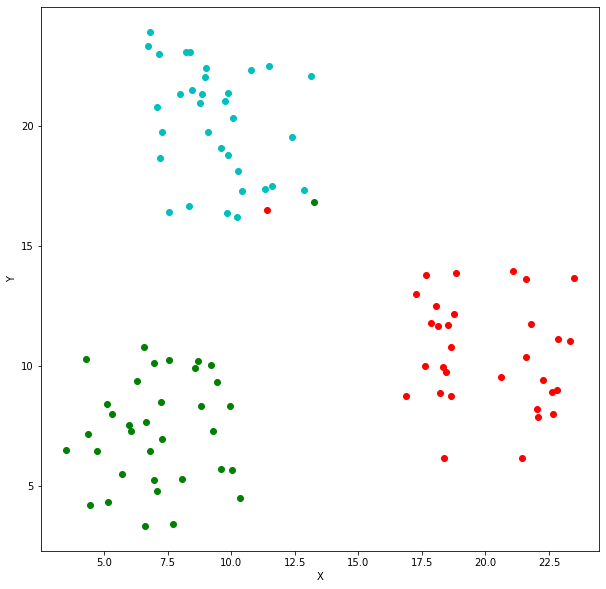

Закончена эпоха 112


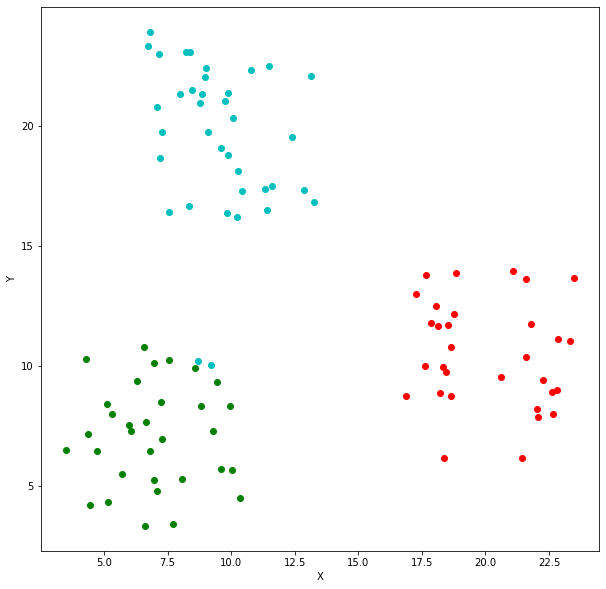

Закончена эпоха 113


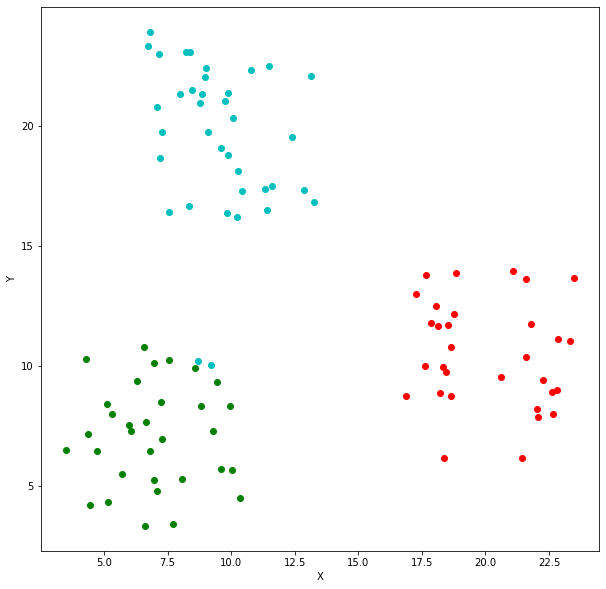

Закончена эпоха 114


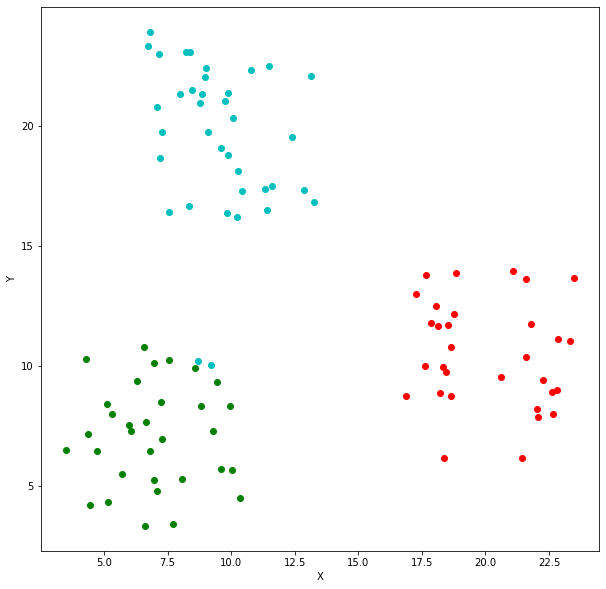

Закончена эпоха 115


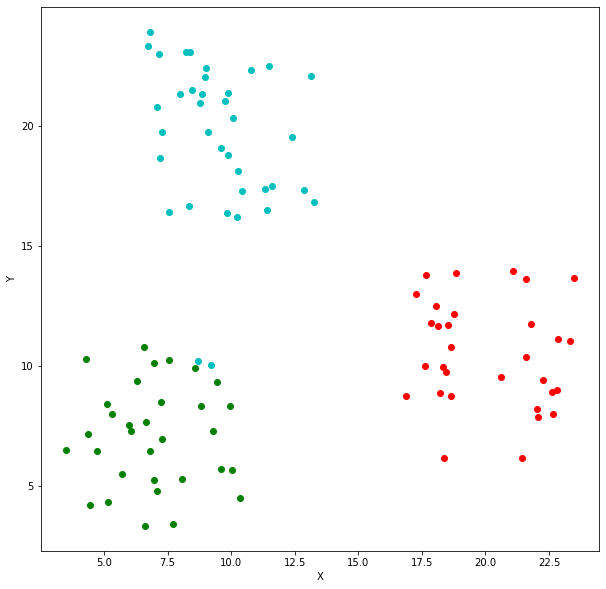

Закончена эпоха 116


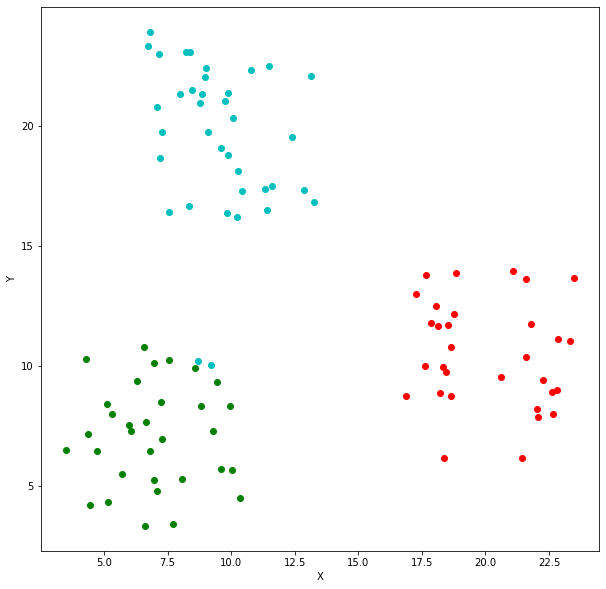

Закончена эпоха 117


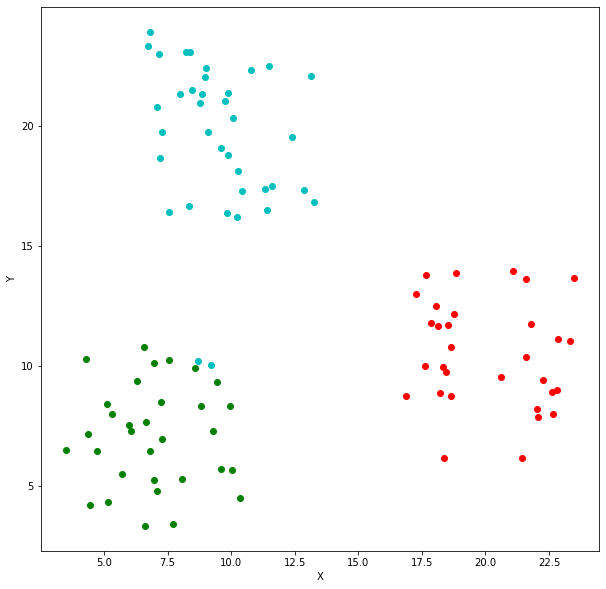

Закончена эпоха 118


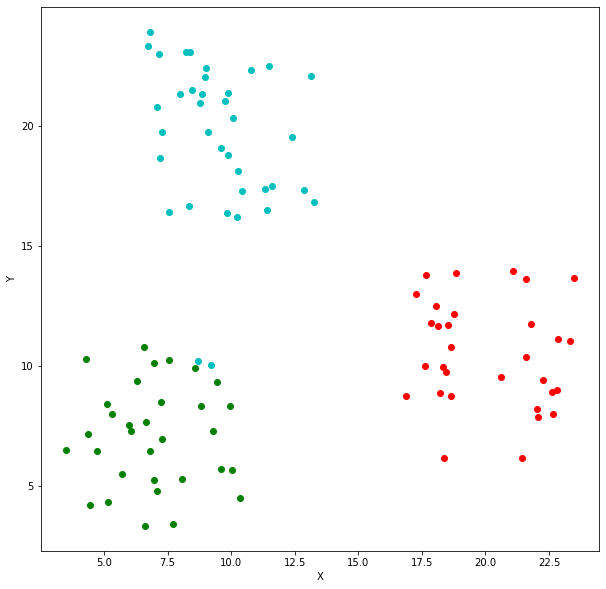

Закончена эпоха 119


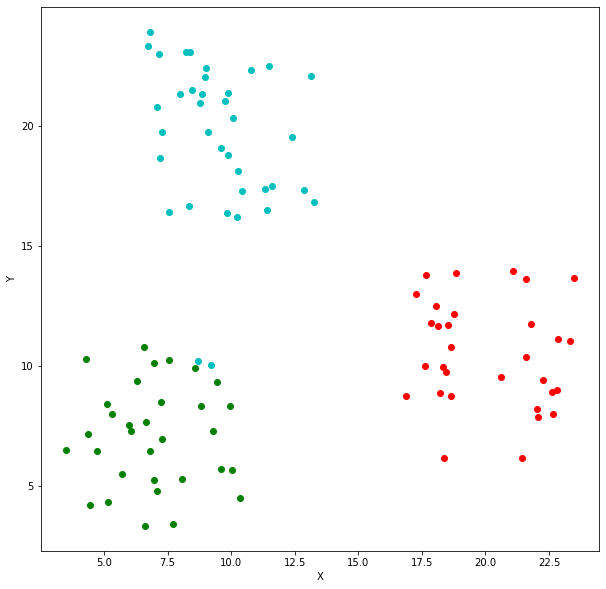

Закончена эпоха 120


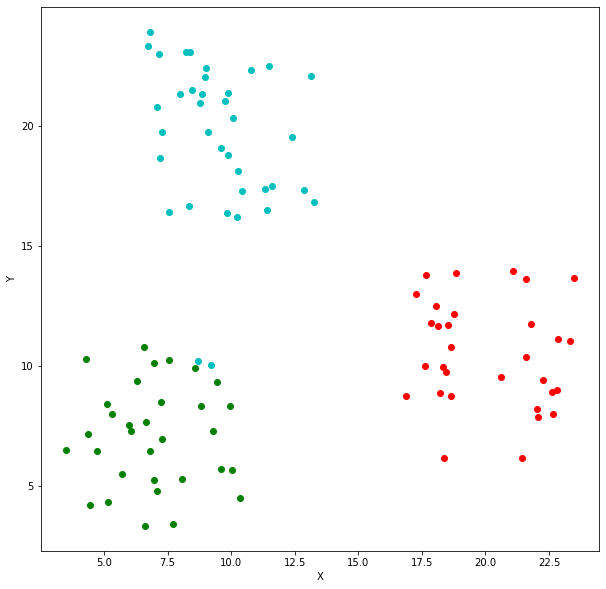

Закончена эпоха 121


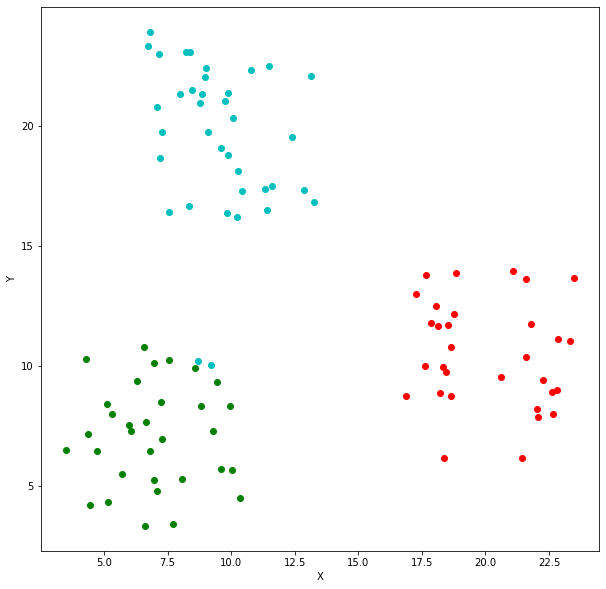

Закончена эпоха 122


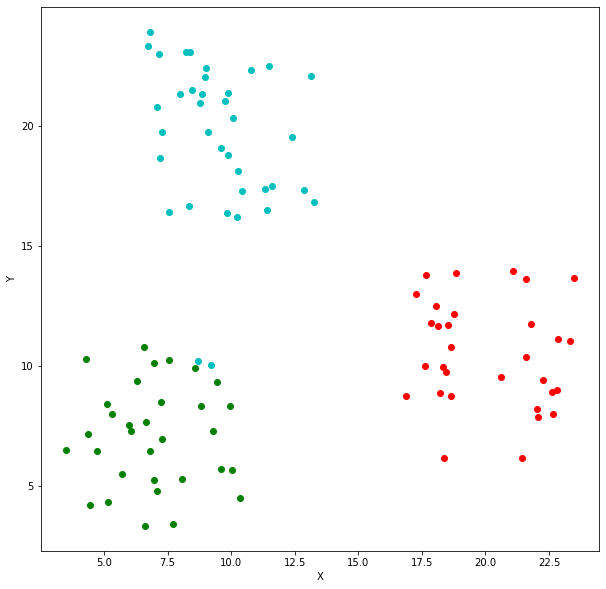

Закончена эпоха 123


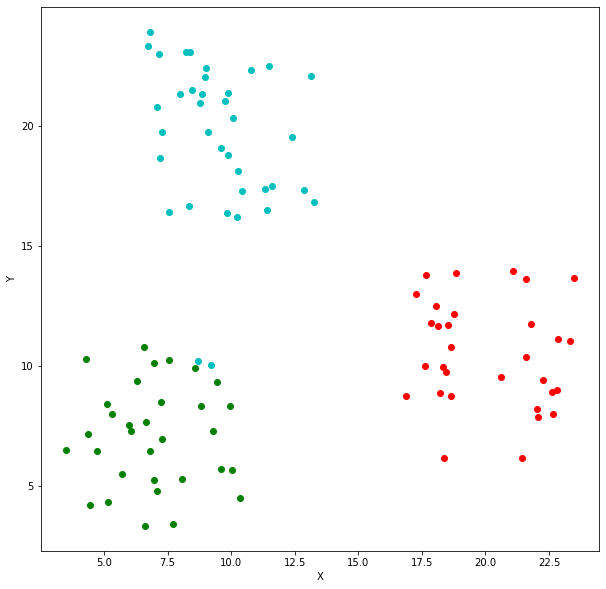

Закончена эпоха 124


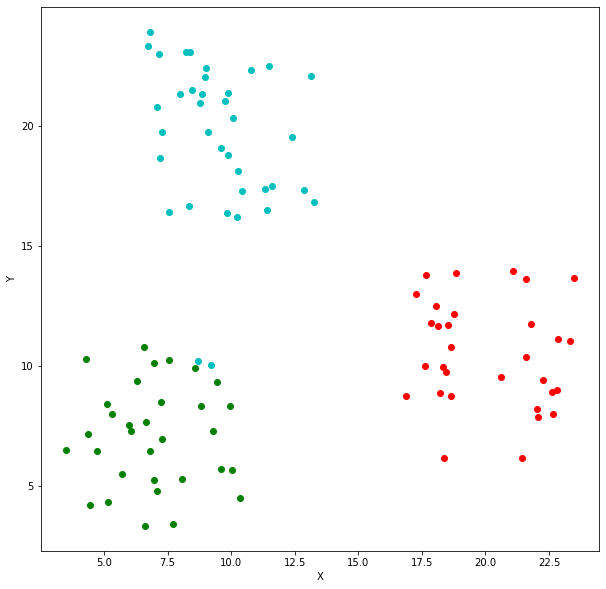

Закончена эпоха 125


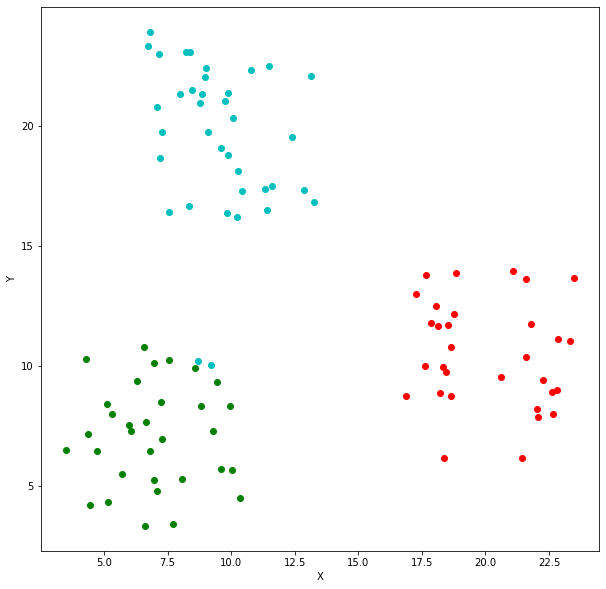

Закончена эпоха 126


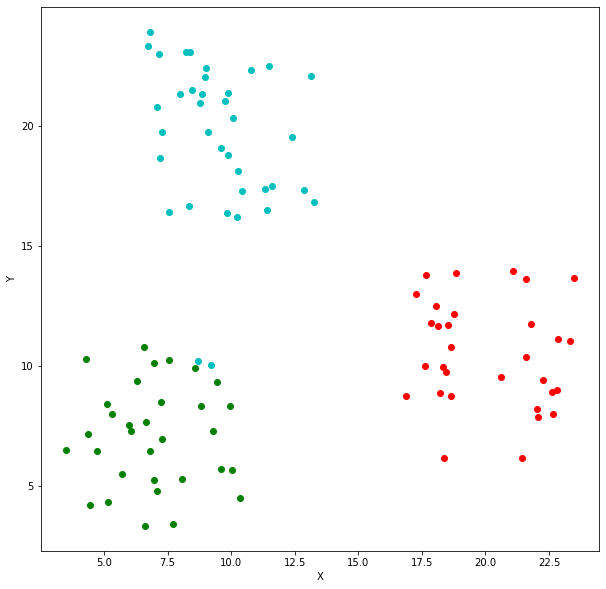

Закончена эпоха 127


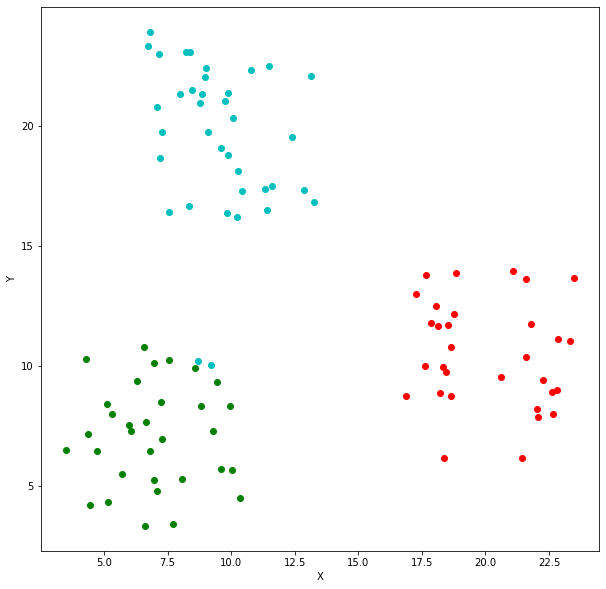

Закончена эпоха 128


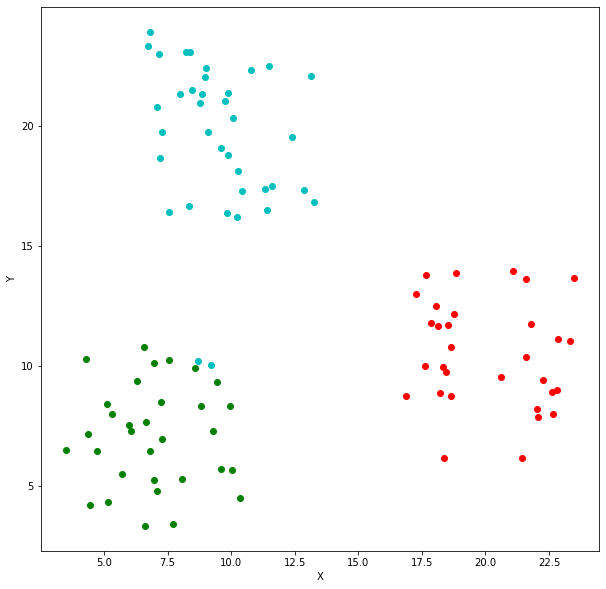

Закончена эпоха 129


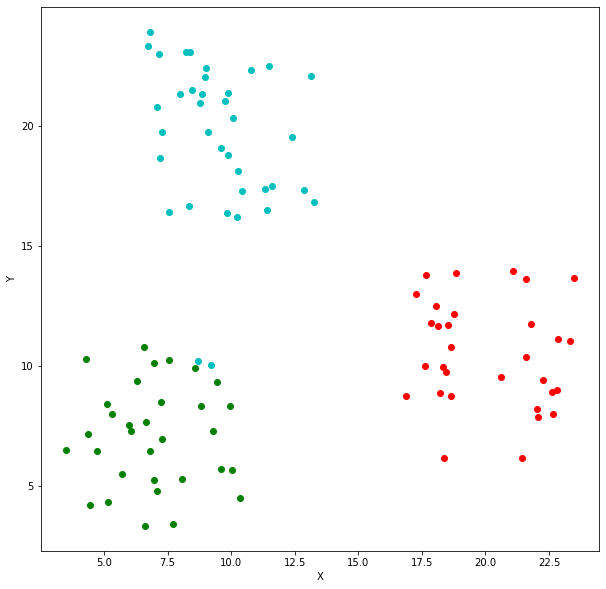

Закончена эпоха 130


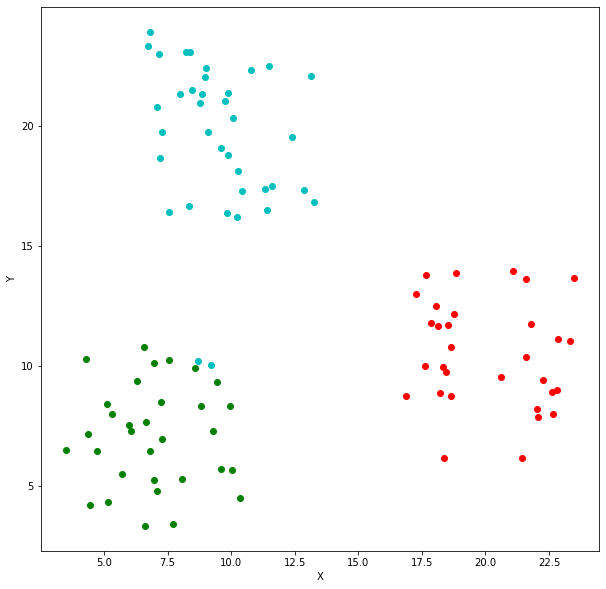

Закончена эпоха 131


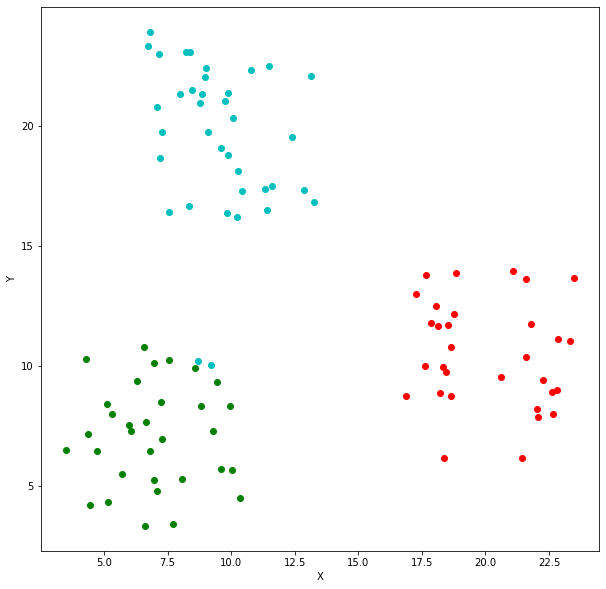

Закончена эпоха 132


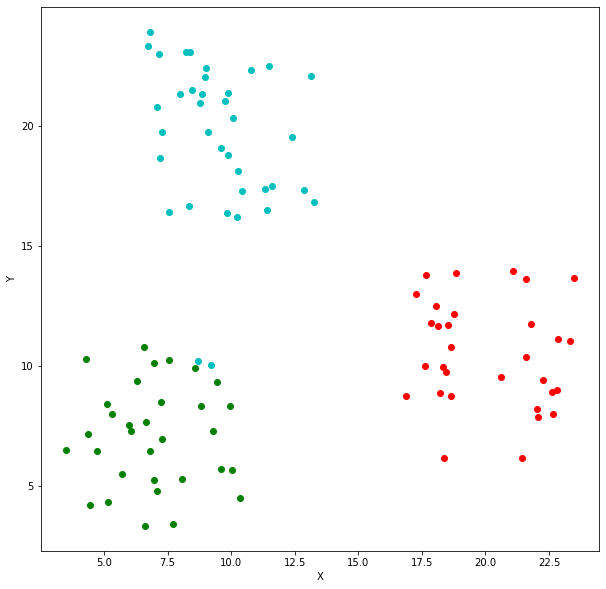

Закончена эпоха 133


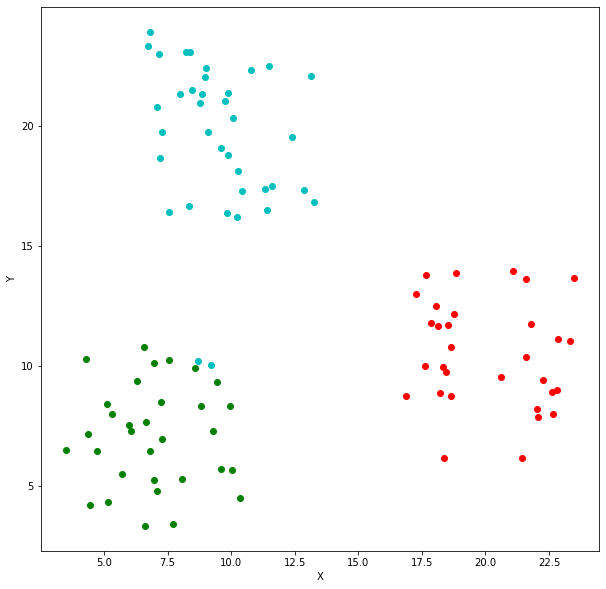

Закончена эпоха 134


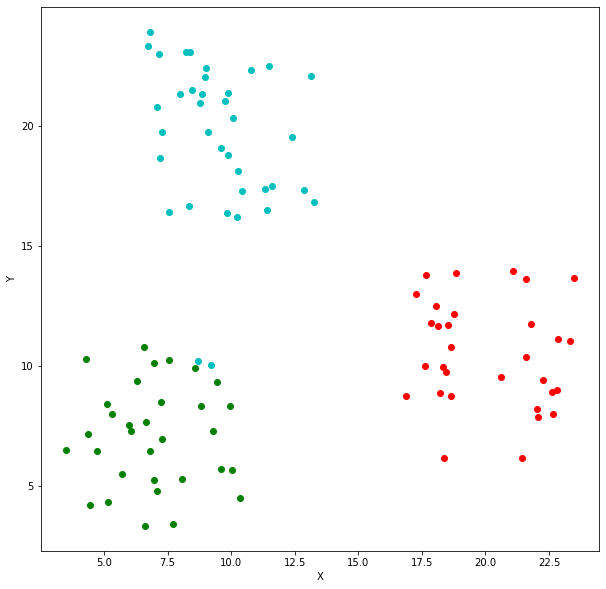

Закончена эпоха 135


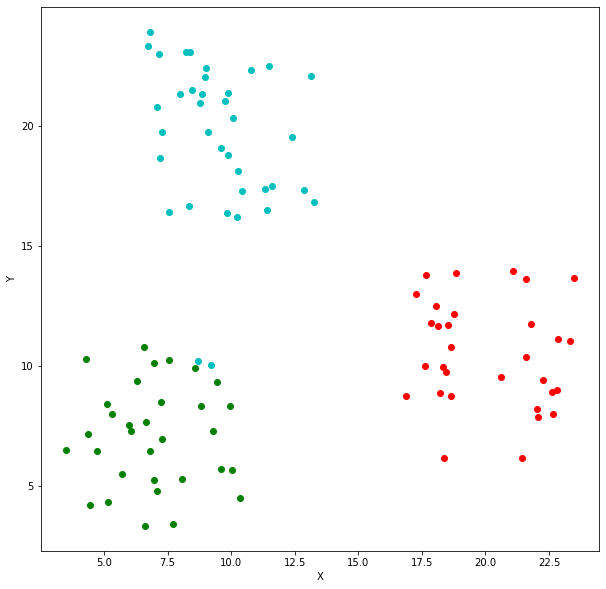

Закончена эпоха 136


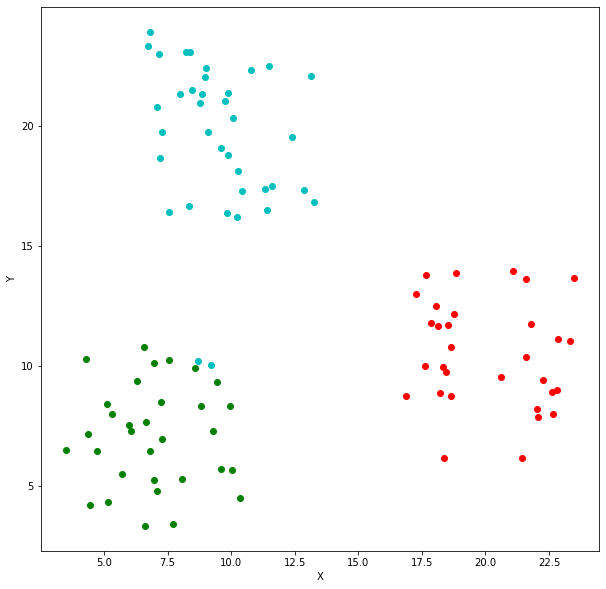

Закончена эпоха 137


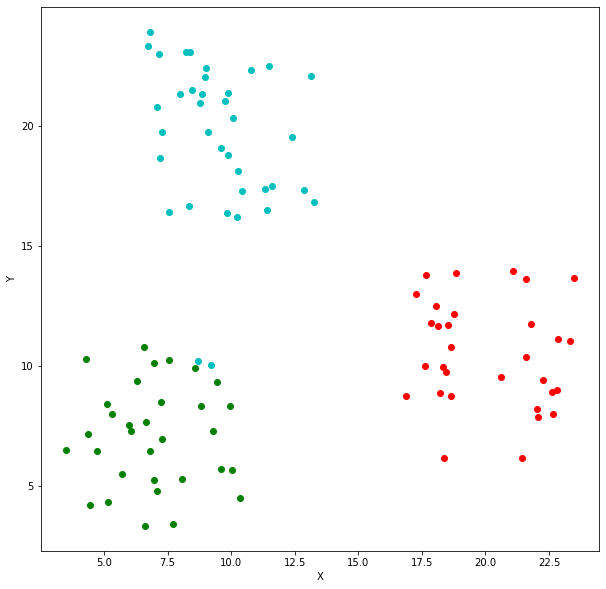

Закончена эпоха 138


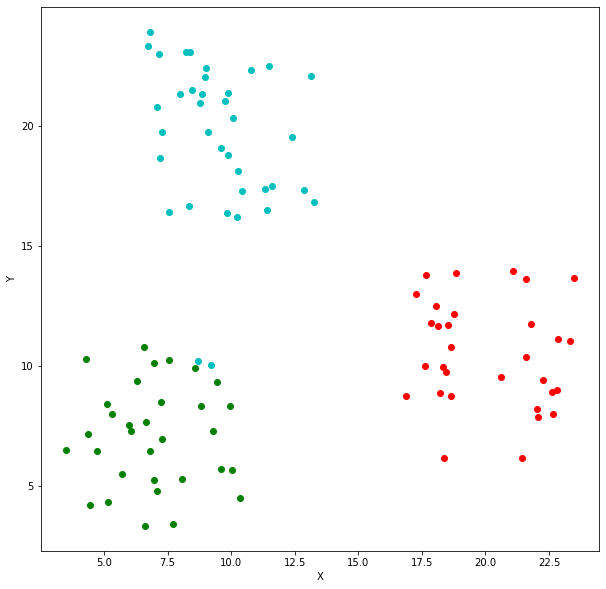

Закончена эпоха 139


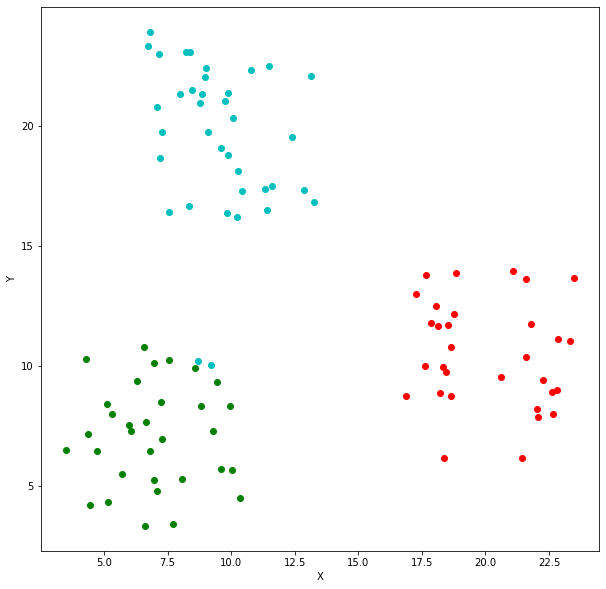

Закончена эпоха 140


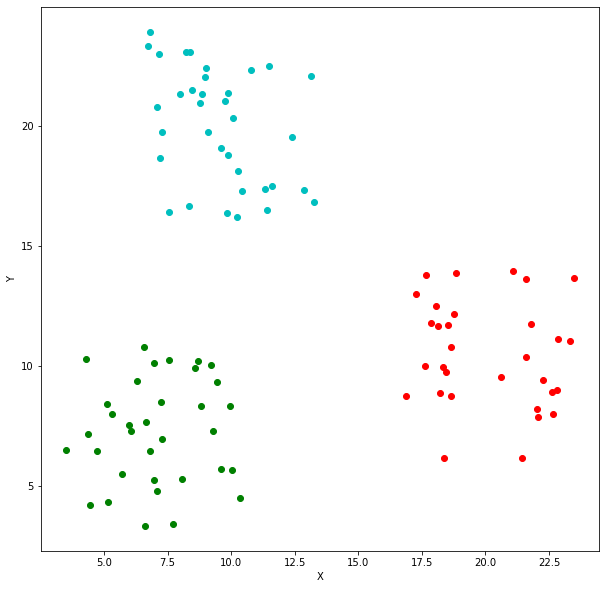

Закончена эпоха 141


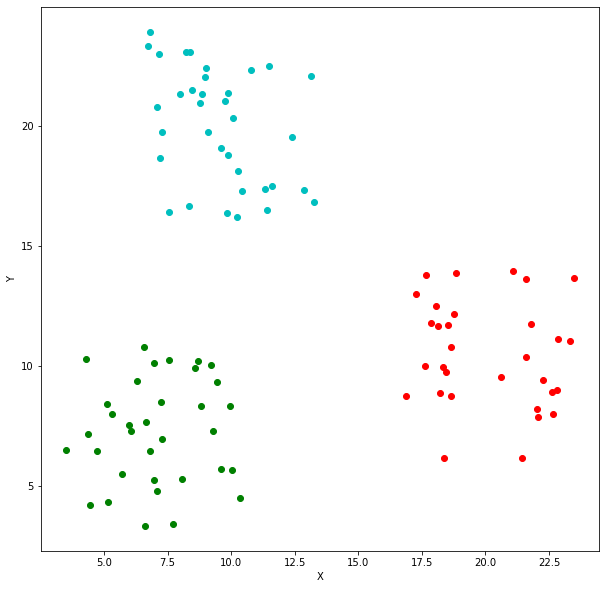

Закончена эпоха 142


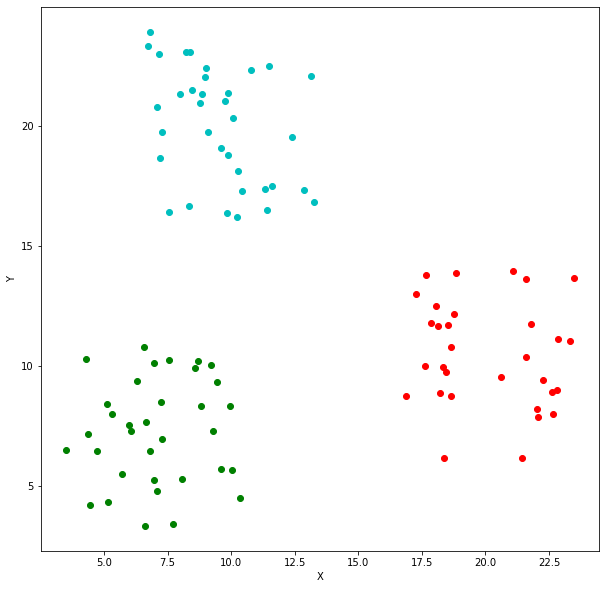

Закончена эпоха 143


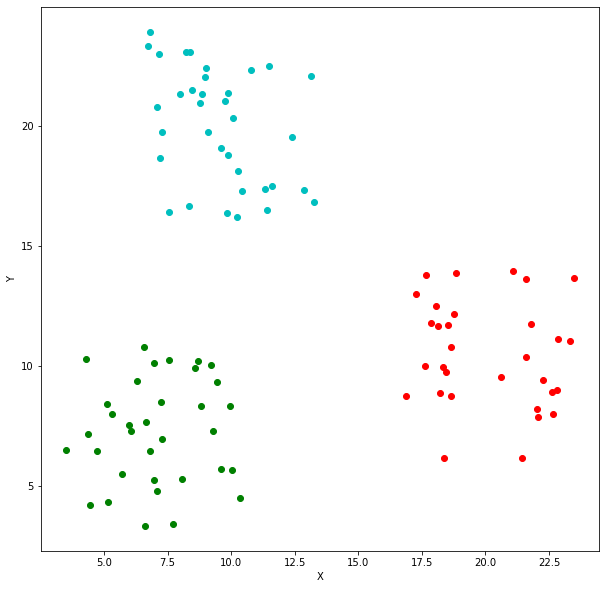

Закончена эпоха 144


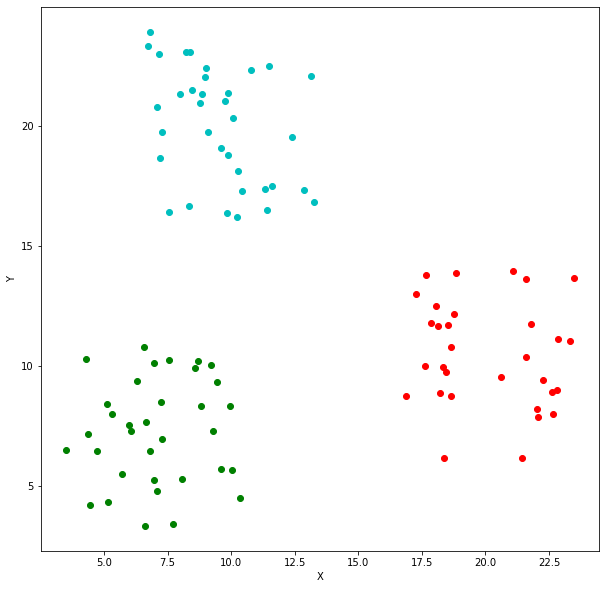

Закончена эпоха 145


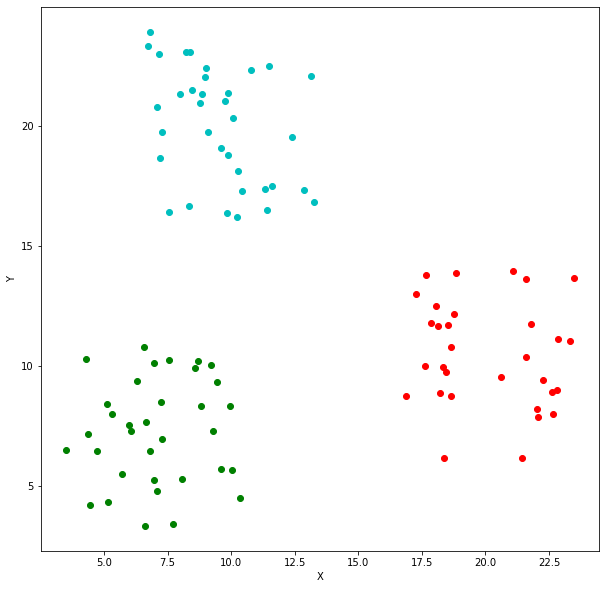

Закончена эпоха 146


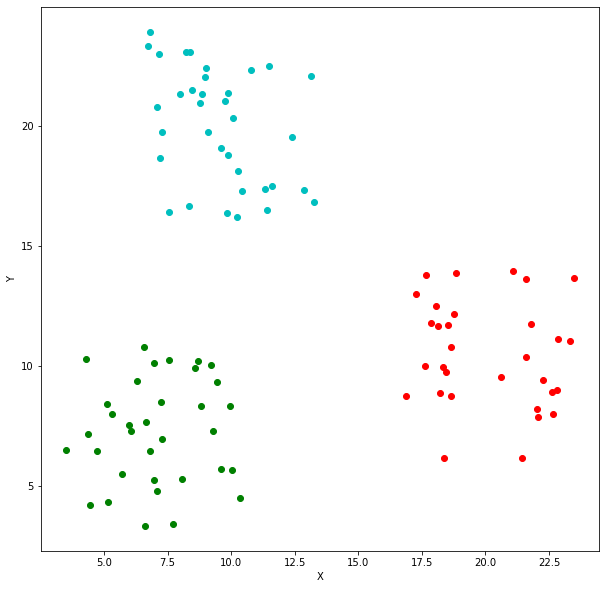

Закончена эпоха 147


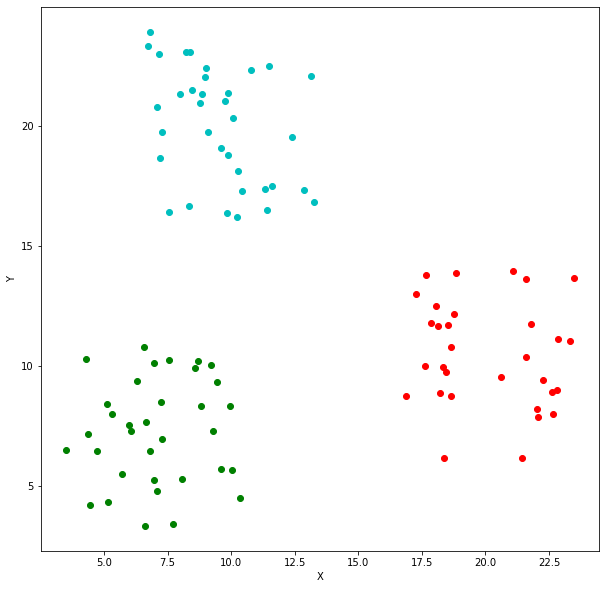

Закончена эпоха 148


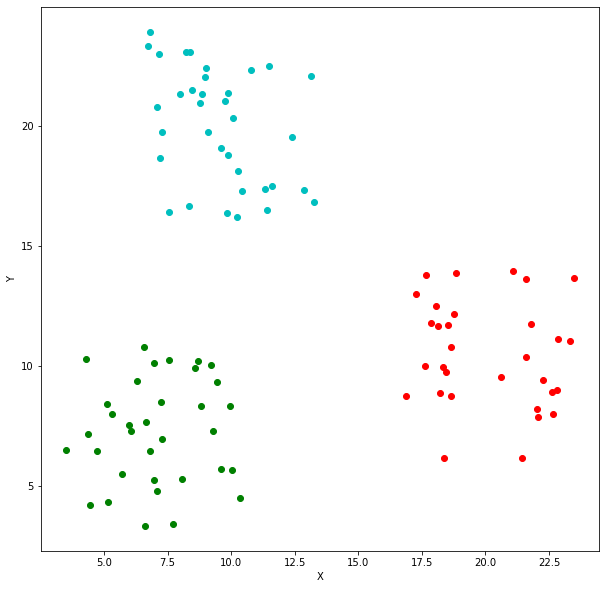

Закончена эпоха 149


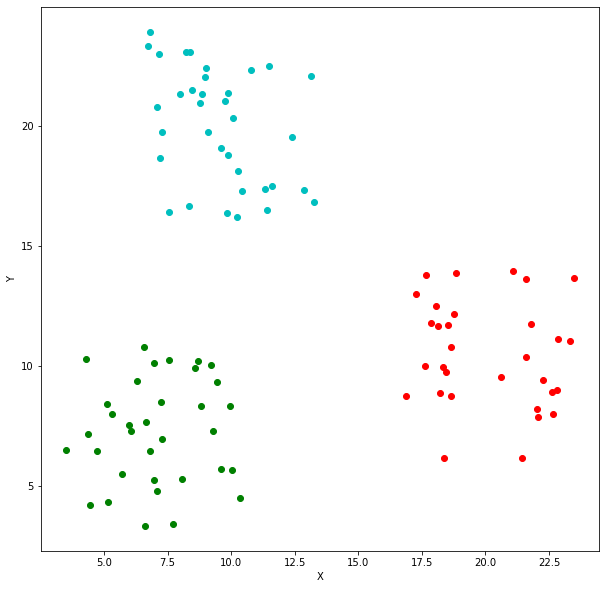

In [ ]:
n = 500                         # Размер популяции ботов
nsurv = 100                     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv                # Количество новых (столько новых ботов создается)
l = N_points                    # ДЛИНА БОТА = КОЛИЧЕСТВУ ТОЧЕК
epohs = 150                     # Количество эпох
mut = 0.10                      # Коэфициент мутаций

popul = []       # Двумерный массив популяции, размерностью [n, l]. 200 ботов по 100 компонентов каждый
val = []         # Одномерный массив значений этих ботов

# Первичное создание рандомных ботов

for i in range(n):                     # Цикл по всей длине популяции 
  popul.append([])                     # Создаем пустого бота
  for j in range(l):                   # Проходим по всей длине бота
    popul[i].append(random.randint(0, len(Classes)-1)) # В каждый компонент бота рандомно записываем класс  



# На кажной эпохе определяем выживших и создаем новых ботов
for it in range(epohs):                # Цикл по эпохам обучения
  
  val = []                             # Создаем пустой список для значений ботов

  # Проходим по всей длине популяции
  for i in range(n):
    bot = popul[i]                     # Берем очередного бота
    # в каждой позиции бота закодирован класс соответствующей точки
    # значение бота = это сумма расстояний от текущей точки до 
    # центроида своего класса
    sum_distanse = 0
    for j in range(l):          
      sum_distanse += points_dist(points[j][0], points[j][1], Classes[int(bot[j])][0], Classes[int(bot[j])][1])
    val.append(sum_distanse)         # добавляем значение в список на эпоху
                                 
  # Получаем новую популяцию и сортированный список значений
  # (здесь пока только "выжившие" == nsurv)
  newpopul, sval = getSurvPopul2(popul, val, nsurv, 0)       
  #print(it, " ", [round(s,8) for s in sval[0:5]])           # Выводим 5 лучших ботов из выживших
 

  for i in range(nnew):                 # Проходимся в цикле nnew-раз (сколько нужно новых ботов)
    botp1, botp2 = getParents2(newpopul, nsurv)            # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
    newbot = []                         # Массив для нового бота
    # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
    for j in range(l):                  # Проходим по всей длине бота
      x = crossPointFrom2Parents2(botp1, botp2, j)       # Получаем значение для j-ого компонента бота

      # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
      if (random.random() < mut):
        x = random.randint(0, len(Classes)-1)       
      newbot.append(x)                  # Добавляем новое значение в бота      
    newpopul.append(newbot)             # Добавляем бота в новую популяцию 
  popul = newpopul                      # Записываем в popul посчитанную новую популяцию
   


  # Запишем в points данные лучшего бота после прошедшей эпохи
  bot_epoh = popul[0]                                       
  #print ('Значения лучшего бота на эпохе:', bot_epoh)             

  for j in range(len(bot_epoh)):          # Проходим по всей длине бота
    points[j][2] = bot_epoh[j]
  # Отрисуем точки в цветах по окончании эпохи
  print('Закончена эпоха', it)
  points_array = np.array(points)
  plot_points(points_array)


**В качестве бота взят вектор  равный  по длине количеству точек. Каждая позиция вектора - это класс соответствующей точки. Значение бота - сумма расстояний от данной точки до центроида одного с ней класса. Если такая сумма минимальна, то значит класс присвоен правильно**